#Requirements 

In [ ]:
!pip install CityLearn
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np        
import time
import pandas as pd
import plotly.express as px
from citylearn.data import DataSet
import os
from sklearn.metrics import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting unin

In [ ]:
import seaborn as sns
from citylearn.citylearn import CityLearnEnv
from citylearn.utilities import read_json

#Data analysis 

In [ ]:
building_data = pd.read_csv('/content/Building_1.csv')
building_data.head()

Month  Hour  Day Type  Daylight Savings Status  Indoor Temperature [C]  \
0      1     1         8                        0                   23.77   
1      1     2         8                        0                   23.59   
2      1     3         8                        0                   23.50   
3      1     4         8                        0                   23.41   
4      1     5         8                        0                   23.34   

   Average Unmet Cooling Setpoint Difference [C]  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Indoor Relative Humidity [%]  Equipment Electric Power [kWh]  \
0                         42.87                            9.89   
1                         43.49                            9.08   
2                         43.82                            8.22   
3                         44.15                            8.57   
4                         44.49                            8.93   

   DHW Heating [kWh]  Cooling Load [kWh]  
0                0.0                 0.0  
1                0.0                 0.0  
2                0.0                 0.0  
3                0.0                 0.0  
4                0.0                 0.0

In [ ]:
solar_generation = pd.read_csv('/content/solar_generation_1kW.csv')
solar_generation.head()

Hours since 00:00 Jan 1  Hourly Data: AC inverter power (W)
0                      0.5                                 0.0
1                      1.5                                 0.0
2                      2.5                                 0.0
3                      3.5                                 0.0
4                      4.5                                 0.0

In [ ]:
building_data['Solar Generation [W/kW]'] = list(solar_generation['Hourly Data: AC inverter power (W)'])

In [ ]:
building_data

Month  Hour  Day Type  Daylight Savings Status  Indoor Temperature [C]  \
0         1     1         8                        0                   23.77   
1         1     2         8                        0                   23.59   
2         1     3         8                        0                   23.50   
3         1     4         8                        0                   23.41   
4         1     5         8                        0                   23.34   
...     ...   ...       ...                      ...                     ...   
8755     12    20         1                        0                   20.89   
8756     12    21         1                        0                   20.76   
8757     12    22         1                        0                   20.66   
8758     12    23         1                        0                   20.58   
8759     12    24         1                        0                   20.49   

      Average Unmet Cooling Setpoint Difference [C]  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
8755                                            0.0   
8756                                            0.0   
8757                                            0.0   
8758                                            0.0   
8759                                            0.0   

      Indoor Relative Humidity [%]  Equipment Electric Power [kWh]  \
0                            42.87                            9.89   
1                            43.49                            9.08   
2                            43.82                            8.22   
3                            44.15                            8.57   
4                            44.49                            8.93   
...                            ...                             ...   
8755                         55.83                            9.37   
8756                         56.07                           10.13   
8757                         56.23                           10.17   
8758                         56.41                            9.51   
8759                         56.65                            9.48   

      DHW Heating [kWh]  Cooling Load [kWh]  Solar Generation [W/kW]  
0                   0.0                 0.0                      0.0  
1                   0.0                 0.0                      0.0  
2                   0.0                 0.0                      0.0  
3                   0.0                 0.0                      0.0  
4                   0.0                 0.0                      0.0  
...                 ...                 ...                      ...  
8755                0.0                 0.0                      0.0  
8756                0.0                 0.0                      0.0  
8757                0.0                 0.0                      0.0  
8758                0.0                 0.0                      0.0  
8759                0.0                 0.0                      0.0  

[8760 rows x 11 columns]

In [ ]:
display(building_data.describe(include='all'))

Month         Hour     Day Type  Daylight Savings Status  \
count  8760.000000  8760.000000  8760.000000              8760.000000   
mean      6.526027    12.500000     4.134247                 0.654795   
std       3.448048     6.922582     2.077012                 0.475462   
min       1.000000     1.000000     1.000000                 0.000000   
25%       4.000000     6.750000     2.000000                 0.000000   
50%       7.000000    12.500000     4.000000                 1.000000   
75%      10.000000    18.250000     6.000000                 1.000000   
max      12.000000    24.000000     8.000000                 1.000000   

       Indoor Temperature [C]  Average Unmet Cooling Setpoint Difference [C]  \
count             8760.000000                                    8760.000000   
mean                23.339247                                       0.003623   
std                  1.477051                                       0.016137   
min                 17.970000                                       0.000000   
25%                 22.250000                                       0.000000   
50%                 23.650000                                       0.000000   
75%                 24.332500                                       0.000000   
max                 26.340000                                       0.270000   

       Indoor Relative Humidity [%]  Equipment Electric Power [kWh]  \
count                   8760.000000                     8760.000000   
mean                      46.658108                       24.833749   
std                        6.566333                       17.091484   
min                       21.130000                        7.440000   
25%                       43.667500                       12.090000   
50%                       47.860000                       15.880000   
75%                       50.470000                       42.620000   
max                       67.460000                       70.910000   

       DHW Heating [kWh]  Cooling Load [kWh]  Solar Generation [W/kW]  
count        8760.000000         8760.000000              8760.000000  
mean            1.387148           63.064034               154.760241  
std             1.543961           77.237163               222.466040  
min             0.000000            0.000000                 0.000000  
25%             0.000000            0.000000                 0.000000  
50%             0.660000           19.110000                 0.000000  
75%             2.480000          115.637500               274.810500  
max             6.590000          299.230000               830.630000

In [ ]:
df = pd.DataFrame({'year': [2015]*8760,
                   'month': building_data.Month,
                   'day': building_data['Day Type'],
                   'hour':building_data.Hour})
building_data['Timestamp'] = pd.to_datetime(df)

In [ ]:
building_data.rename(columns = {'Hour':'Час', 'Equipment Electric Power [kWh]':'Электроэнергия оборудования [кВтч]',"Month":'Месяц'}, inplace = True )
building_data.rename(columns = {'DHW Heating [kWh]':'Нагрузка на отопления [кВтч]'}, inplace = True )
building_data.rename(columns = {'Cooling Load [kWh]':'Нагрузка на охлаждение [кВтч]'}, inplace = True )
building_data.rename(columns = {'Solar Generation [W/kW]':'Выработка солнечной энергии [Вт/кВт]'}, inplace = True )

<Axes: xlabel='Час', ylabel='Электроэнергия оборудования [кВтч]'>

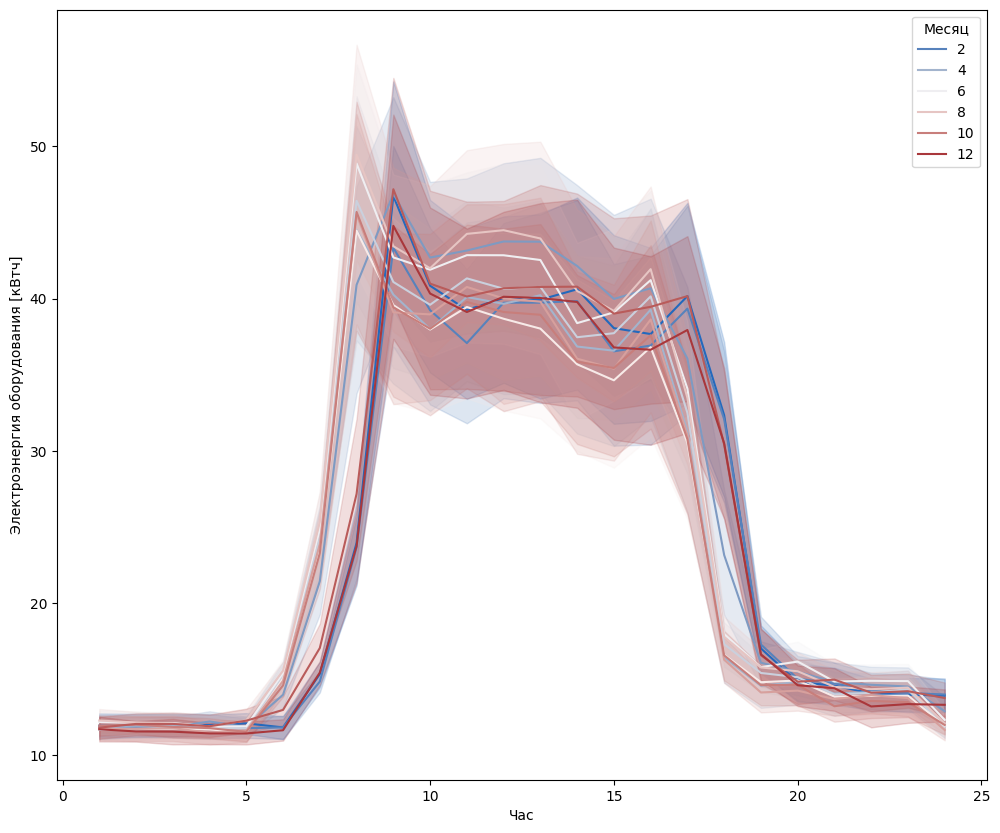

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=building_data, x="Час", y="Электроэнергия оборудования [кВтч]",hue="Месяц",palette = 'vlag')

<Axes: xlabel='Час', ylabel='Нагрузка на отопления [кВтч]'>

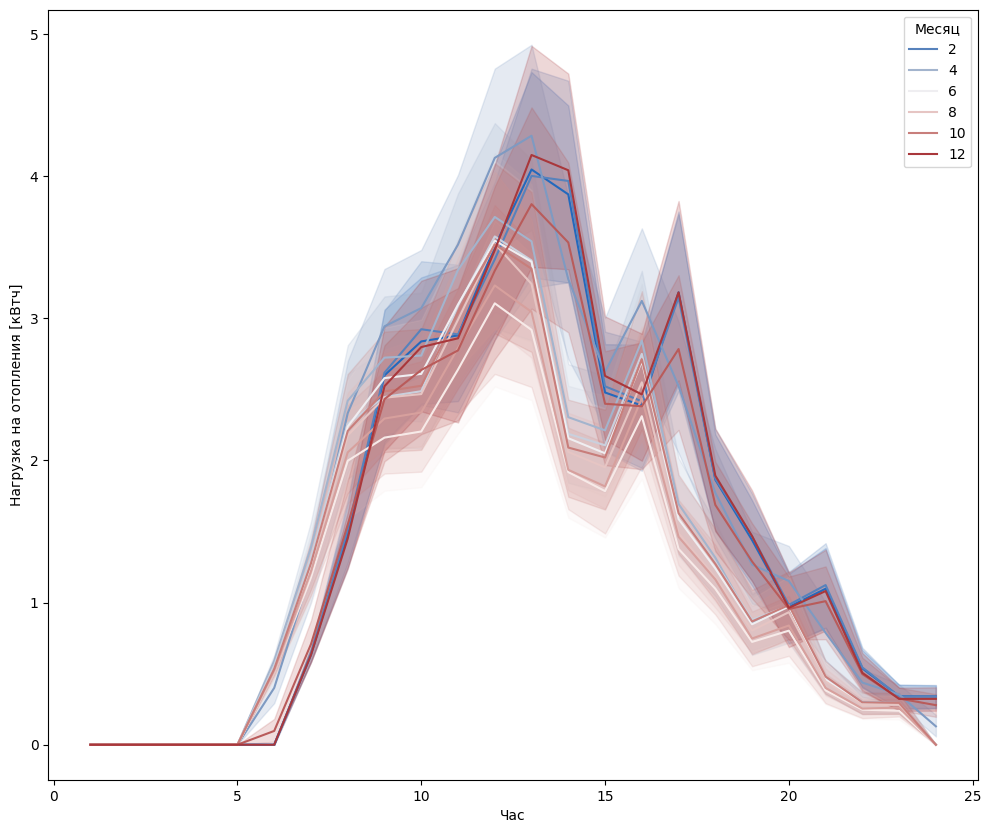

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=building_data, x="Час", y="Нагрузка на отопления [кВтч]",hue="Месяц",palette = 'vlag')

<Axes: xlabel='Час', ylabel='Нагрузка на охлаждение [кВтч]'>

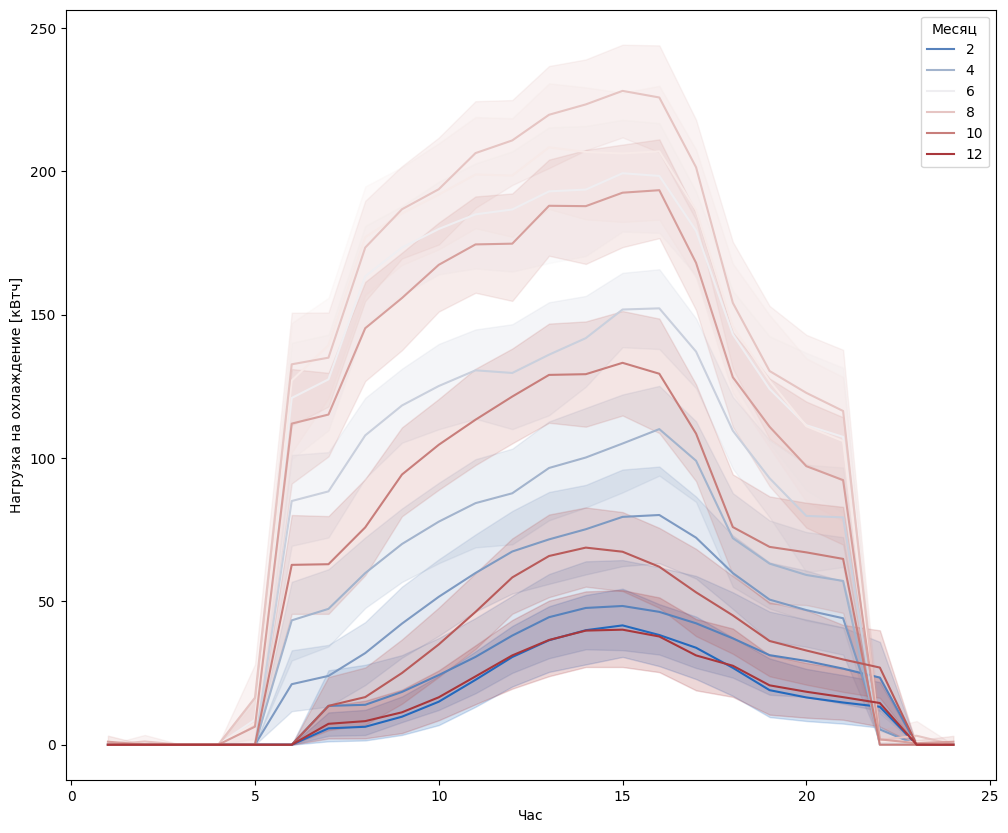

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=building_data, x="Час", y="Нагрузка на охлаждение [кВтч]",hue="Месяц",palette = 'vlag')

<Axes: xlabel='Час', ylabel='Выработка солнечной энергии [Вт/кВт]'>

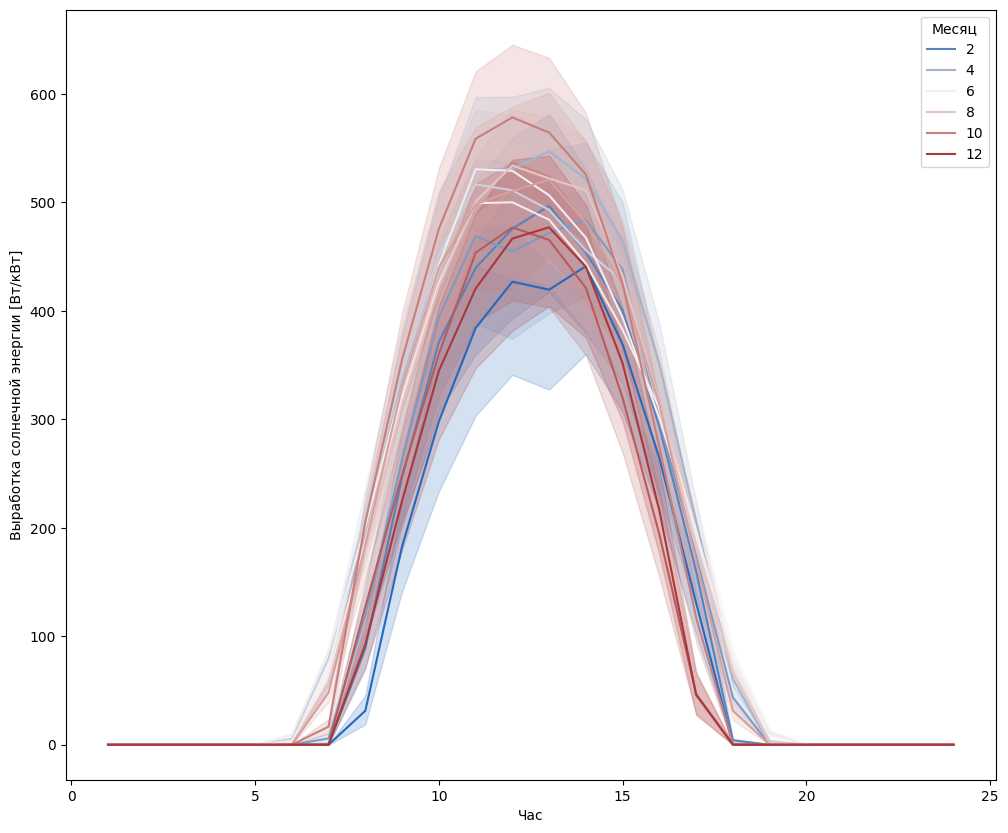

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=building_data, x="Час", y="Выработка солнечной энергии [Вт/кВт]",hue="Месяц",palette = 'vlag')

In [ ]:
weather_data = pd.read_csv('/content/weather_data.csv')
weather_data.head()

Unnamed: 0  Outdoor Drybulb Temperature [C]  Outdoor Relative Humidity [%]  \
0           0                            17.81                          68.12   
1           1                            16.14                          74.75   
2           2                            16.10                          75.88   
3           3                            16.10                          78.25   
4           4                            16.16                          77.75   

   Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   6h Prediction Outdoor Drybulb Temperature [C]  \
0                                          16.19   
1                                          17.20   
2                                          18.76   
3                                          21.43   
4                                          23.37   

   12h Prediction Outdoor Drybulb Temperature [C]  \
0                                           25.29   
1                                           25.96   
2                                           25.90   
3                                           26.08   
4                                           25.84   

   24h Prediction Outdoor Drybulb Temperature [C]  \
0                                           18.31   
1                                           17.25   
2                                           15.07   
3                                           15.21   
4                                           12.91   

   6h Prediction Outdoor Relative Humidity [%]  \
0                                        76.47   
1                                        72.65   
2                                        67.54   
3                                        56.74   
4                                        50.20   

   12h Prediction Outdoor Relative Humidity [%]  \
0                                         44.10   
1                                         41.52   
2                                         41.96   
3                                         42.34   
4                                         42.92   

   24h Prediction Outdoor Relative Humidity [%]  \
0                                         67.32   
1                                         72.46   
2                                         82.54   
3                                         80.86   
4                                         93.52   

   6h Prediction Diffuse Solar Radiation [W/m2]  \
0                                          0.00   
1                                         41.67   
2                                        101.65   
3                                        151.99   
4                                        187.61   

   12h Prediction Diffuse Solar Radiation [W/m2]  \
0                                         171.45   
1                                         132.00   
2                                         118.76   
3                                          69.99   
4                                          34.75   

   24h Prediction Diffuse Solar Radiation [W/m2]  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   6h Prediction Direct Solar Radiation [W/m2]  \
0                                         0.00   
1                                        65.46   
2                                       329.89   
3                                       436.51   
4                                       486.97   

   12h 

In [ ]:
weather_data = weather_data.join(building_data)

In [ ]:
weather_data.rename(columns = {'Diffuse Solar Radiation [W/m2]':'Диффузное солнечное излучение [Вт/м2]', 'Outdoor Drybulb Temperature [C]':'Температура сухой лампы на улице [C]',
                               "Outdoor Relative Humidity [%]":'Относительная влажность на улице [%]','Direct Solar Radiation [W/m2]':'Прямое солнечное излучение [Вт/м2]'}, inplace = True )

<Axes: xlabel='Час', ylabel='Диффузное солнечное излучение [Вт/м2]'>

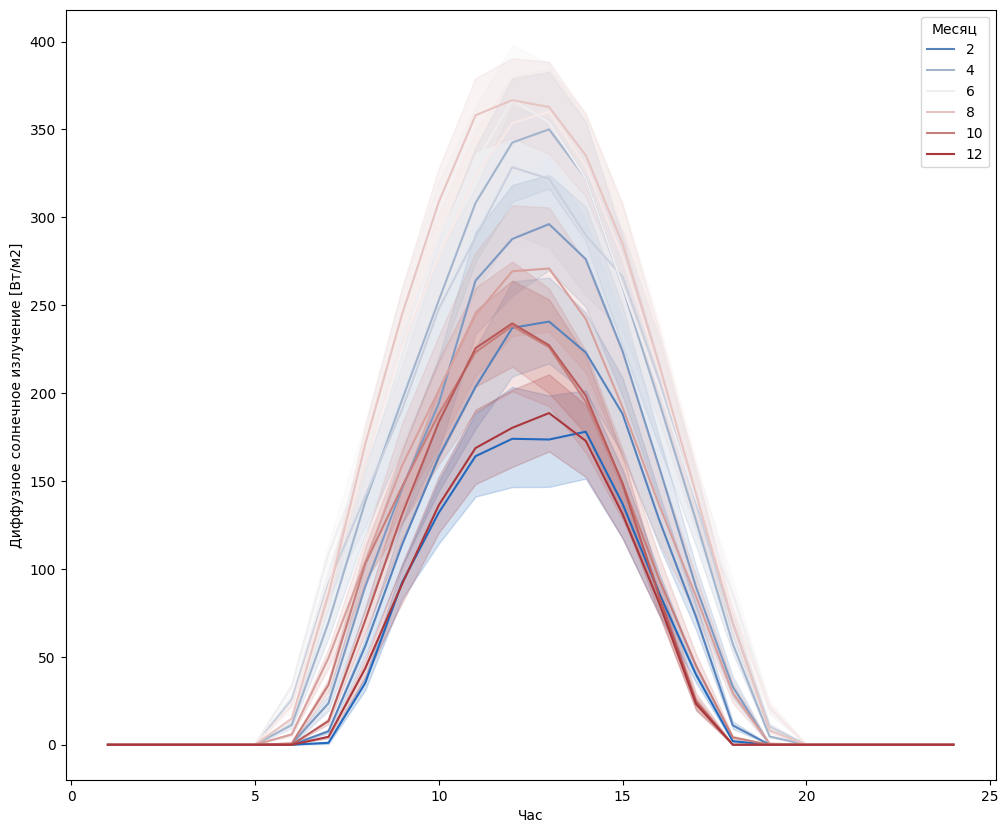

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=weather_data, x="Час", y="Диффузное солнечное излучение [Вт/м2]",hue="Месяц",palette = 'vlag')

<Axes: xlabel='Час', ylabel='Температура сухой лампы на улице [C]'>

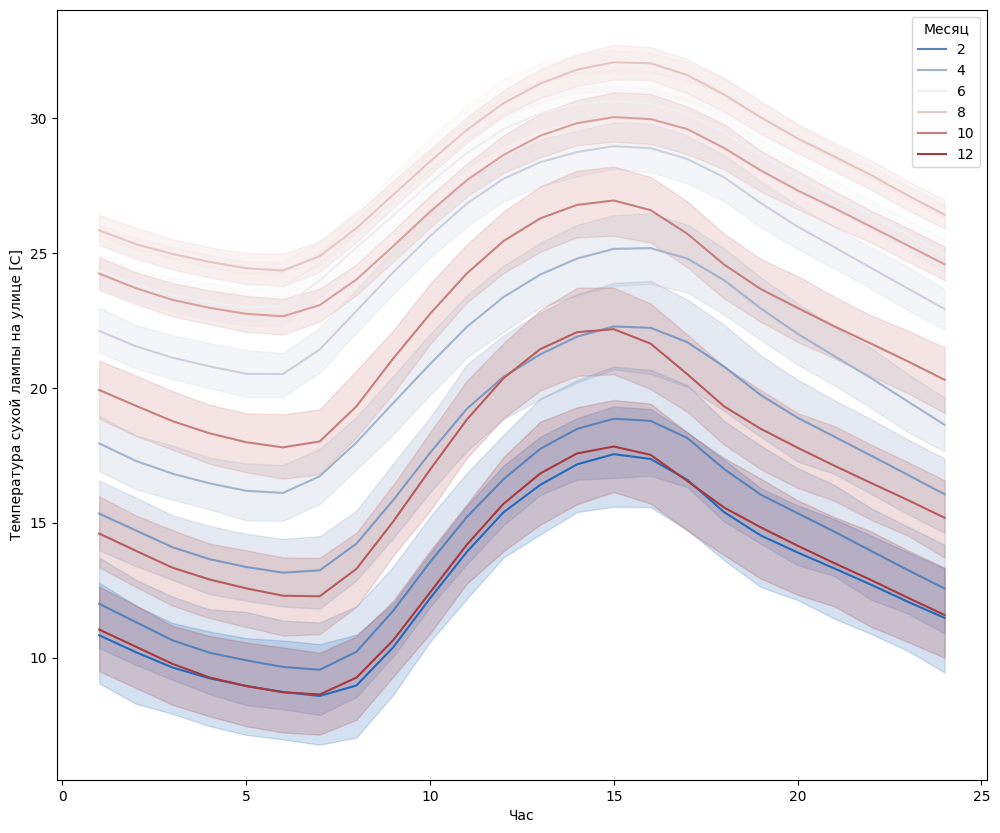

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=weather_data, x="Час", y="Температура сухой лампы на улице [C]",hue="Месяц",palette = 'vlag')

<Axes: xlabel='Час', ylabel='Относительная влажность на улице [%]'>

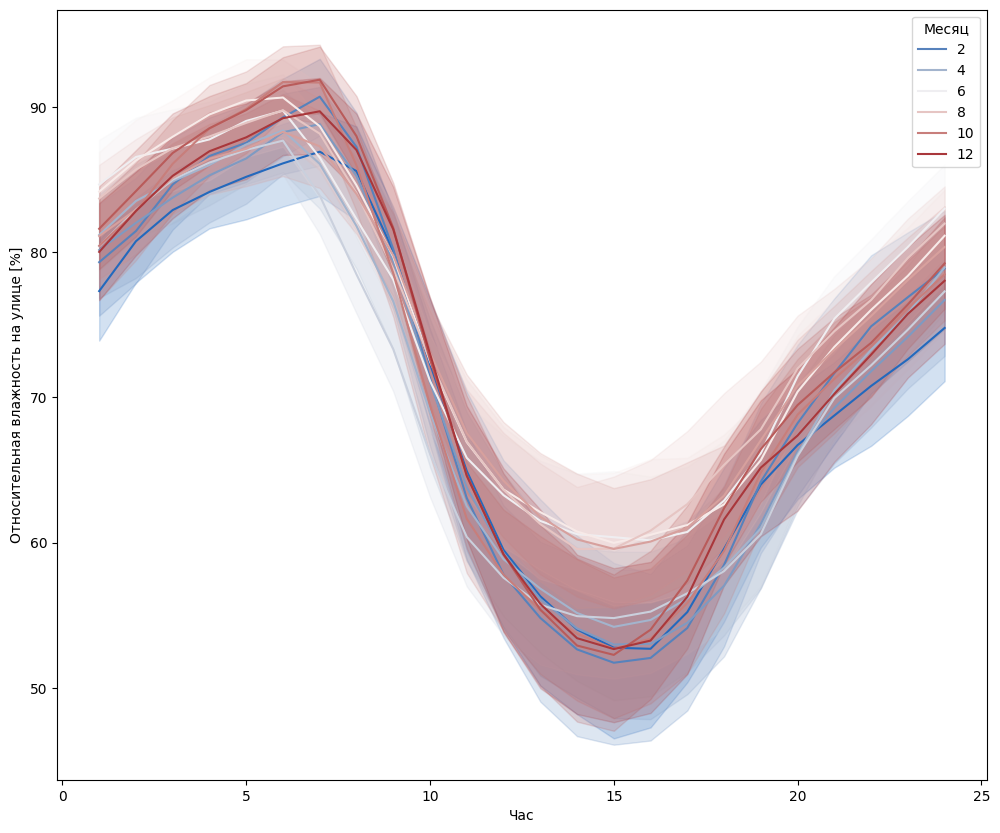

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=weather_data, x="Час", y="Относительная влажность на улице [%]",hue="Месяц",palette = 'vlag')

<Axes: xlabel='Час', ylabel='Прямое солнечное излучение [Вт/м2]'>

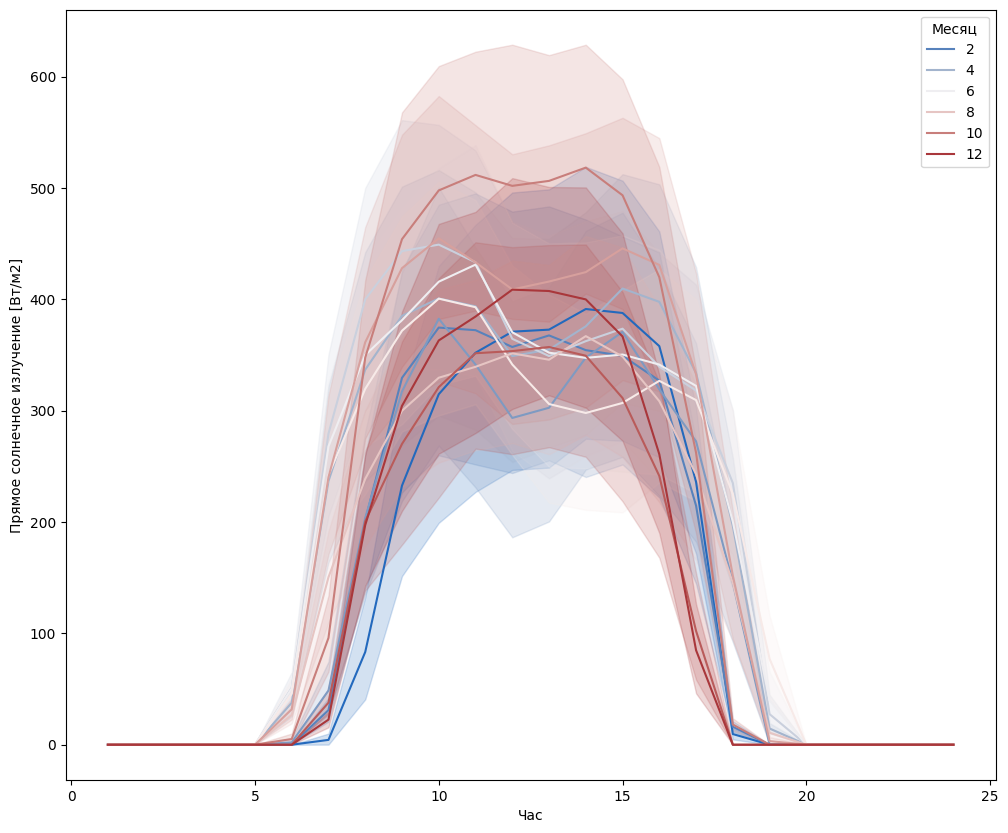

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=weather_data, x="Час", y="Прямое солнечное излучение [Вт/м2]",hue="Месяц",palette = 'vlag')

In [ ]:
DATASET_NAME = 'citylearn_challenge_2022_phase_all'
schema = DataSet.get_schema(DATASET_NAME)
root_directory = schema['root_directory']
building_name = 'Building_1'
filename = schema['buildings'][building_name]['pricing']
filepath = os.path.join(root_directory, filename)
pricing_data = pd.read_csv(filepath)
pricing_data

Electricity Pricing [$]  6h Prediction Electricity Pricing [$]  \
0                        0.22                                   0.22   
1                        0.22                                   0.22   
2                        0.22                                   0.22   
3                        0.22                                   0.22   
4                        0.22                                   0.22   
...                       ...                                    ...   
8755                     0.54                                   0.22   
8756                     0.54                                   0.22   
8757                     0.22                                   0.22   
8758                     0.22                                   0.22   
8759                     0.22                                   0.22   

      12h Prediction Electricity Pricing [$]  \
0                                       0.22   
1                                       0.22   
2                                       0.22   
3                                       0.22   
4                                       0.54   
...                                      ...   
8755                                    0.22   
8756                                    0.22   
8757                                    0.22   
8758                                    0.22   
8759                                    0.22   

      24h Prediction Electricity Pricing [$]  
0                                       0.22  
1                                       0.22  
2                                       0.22  
3                                       0.22  
4                                       0.22  
...                                      ...  
8755                                    0.54  
8756                                    0.54  
8757                                    0.22  
8758                                    0.22  
8759                                    0.22  

[8760 rows x 4 columns]

In [ ]:
pricing_data.rename(columns = {'Electricity Pricing [$]':'Тарифы на электроэнергию [$]'}, inplace = True )
pricing_data = pricing_data.join(building_data)

<Axes: xlabel='Час', ylabel='Тарифы на электроэнергию [$]'>

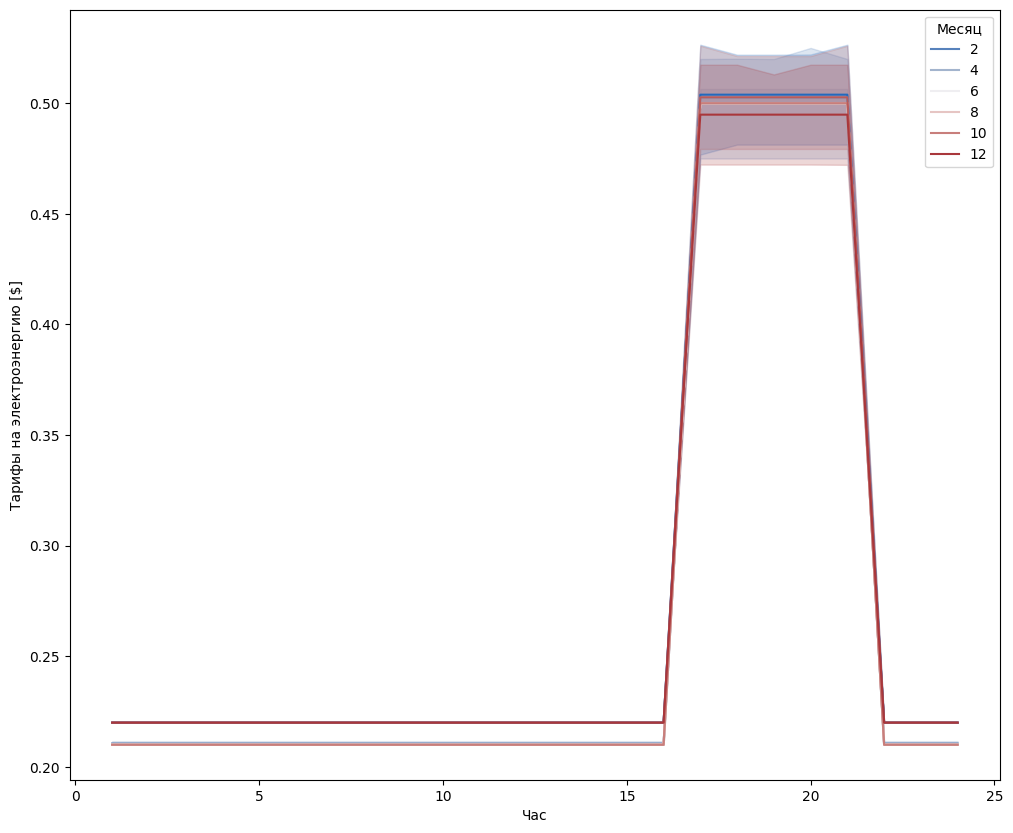

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=pricing_data, x="Час", y="Тарифы на электроэнергию [$]",hue="Месяц",palette = 'vlag')


| | June-September |  | October-May |  |
|---|---|---|---|---|
| **Time** | **Weekday** | **Weekend** | **Weekday** | **Weekend** |
| 8 AM-4 PM | 0.21 | 0.21 | 0.20 | 0.20 |
| 4 PM-9 PM | 0.54 | 0.40 | 0.50 | 0.50 |
| 9 PM-8 AM | 0.21 | 0.21 | 0.20 | 0.20 |

In [ ]:
new_df = weather_data.join(pricing_data,how = 'left', lsuffix='left', rsuffix='right').join(building_data,how = 'left', lsuffix='left', rsuffix='right')

In [ ]:
new_df

Unnamed: 0  Температура сухой лампы на улице [C]  \
0              0                                 17.81   
1              1                                 16.14   
2              2                                 16.10   
3              3                                 16.10   
4              4                                 16.16   
...          ...                                   ...   
8755        8755                                 13.07   
8756        8756                                 12.14   
8757        8757                                 11.18   
8758        8758                                 10.18   
8759        8759                                  9.18   

      Относительная влажность на улице [%]  \
0                                    68.12   
1                                    74.75   
2                                    75.88   
3                                    78.25   
4                                    77.75   
...                                    ...   
8755                                 82.50   
8756                                 85.88   
8757                                 91.38   
8758                                 97.75   
8759                                100.00   

      Диффузное солнечное излучение [Вт/м2]  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
8755                                    0.0   
8756                                    0.0   
8757                                    0.0   
8758                                    0.0   
8759                                    0.0   

      Прямое солнечное излучение [Вт/м2]  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
...                                  ...   
8755                                 0.0   
8756                                 0.0   
8757                                 0.0   
8758                                 0.0   
8759                                 0.0   

      6h Prediction Outdoor Drybulb Temperature [C]  \
0                                             16.19   
1                                             17.20   
2                                             18.76   
3                                             21.43   
4                                             23.37   
...                                             ...   
8755                                          12.27   
8756                                          11.94   
8757                                          10.85   
8758                                          10.70   
8759                                          10.59   

      12h Prediction Outdoor Drybulb Temperature [C]  \
0                                              25.29   
1                                              25.96   
2                                              25.90   
3                                              26.08   
4                                              25.84   
...                                              ...   
8755                                           10.88   
8756                                           10.43   
8757                                           11.33   
8758                                           11.23   
8759                                           13.12   

      24h Prediction Outdoor Drybulb Temperature [C]  \
0                                              18.31   
1                                              17.25   
2                                              15.07   
3                                              15.21   
4                                              1

In [ ]:
new_df.rename(columns = {'Day Type':'День недели'}, inplace = True )

In [ ]:
corr = new_df[[
       'Выработка солнечной энергии [Вт/кВт]', 'Нагрузка на отопления [кВтч]','Нагрузка на охлаждение [кВтч]',
       'Электроэнергия оборудования [кВтч]',
       'Час','Месяц','День недели','Диффузное солнечное излучение [Вт/м2]','Температура сухой лампы на улице [C]','Относительная влажность на улице [%]','Прямое солнечное излучение [Вт/м2]']].corr()

<Axes: >

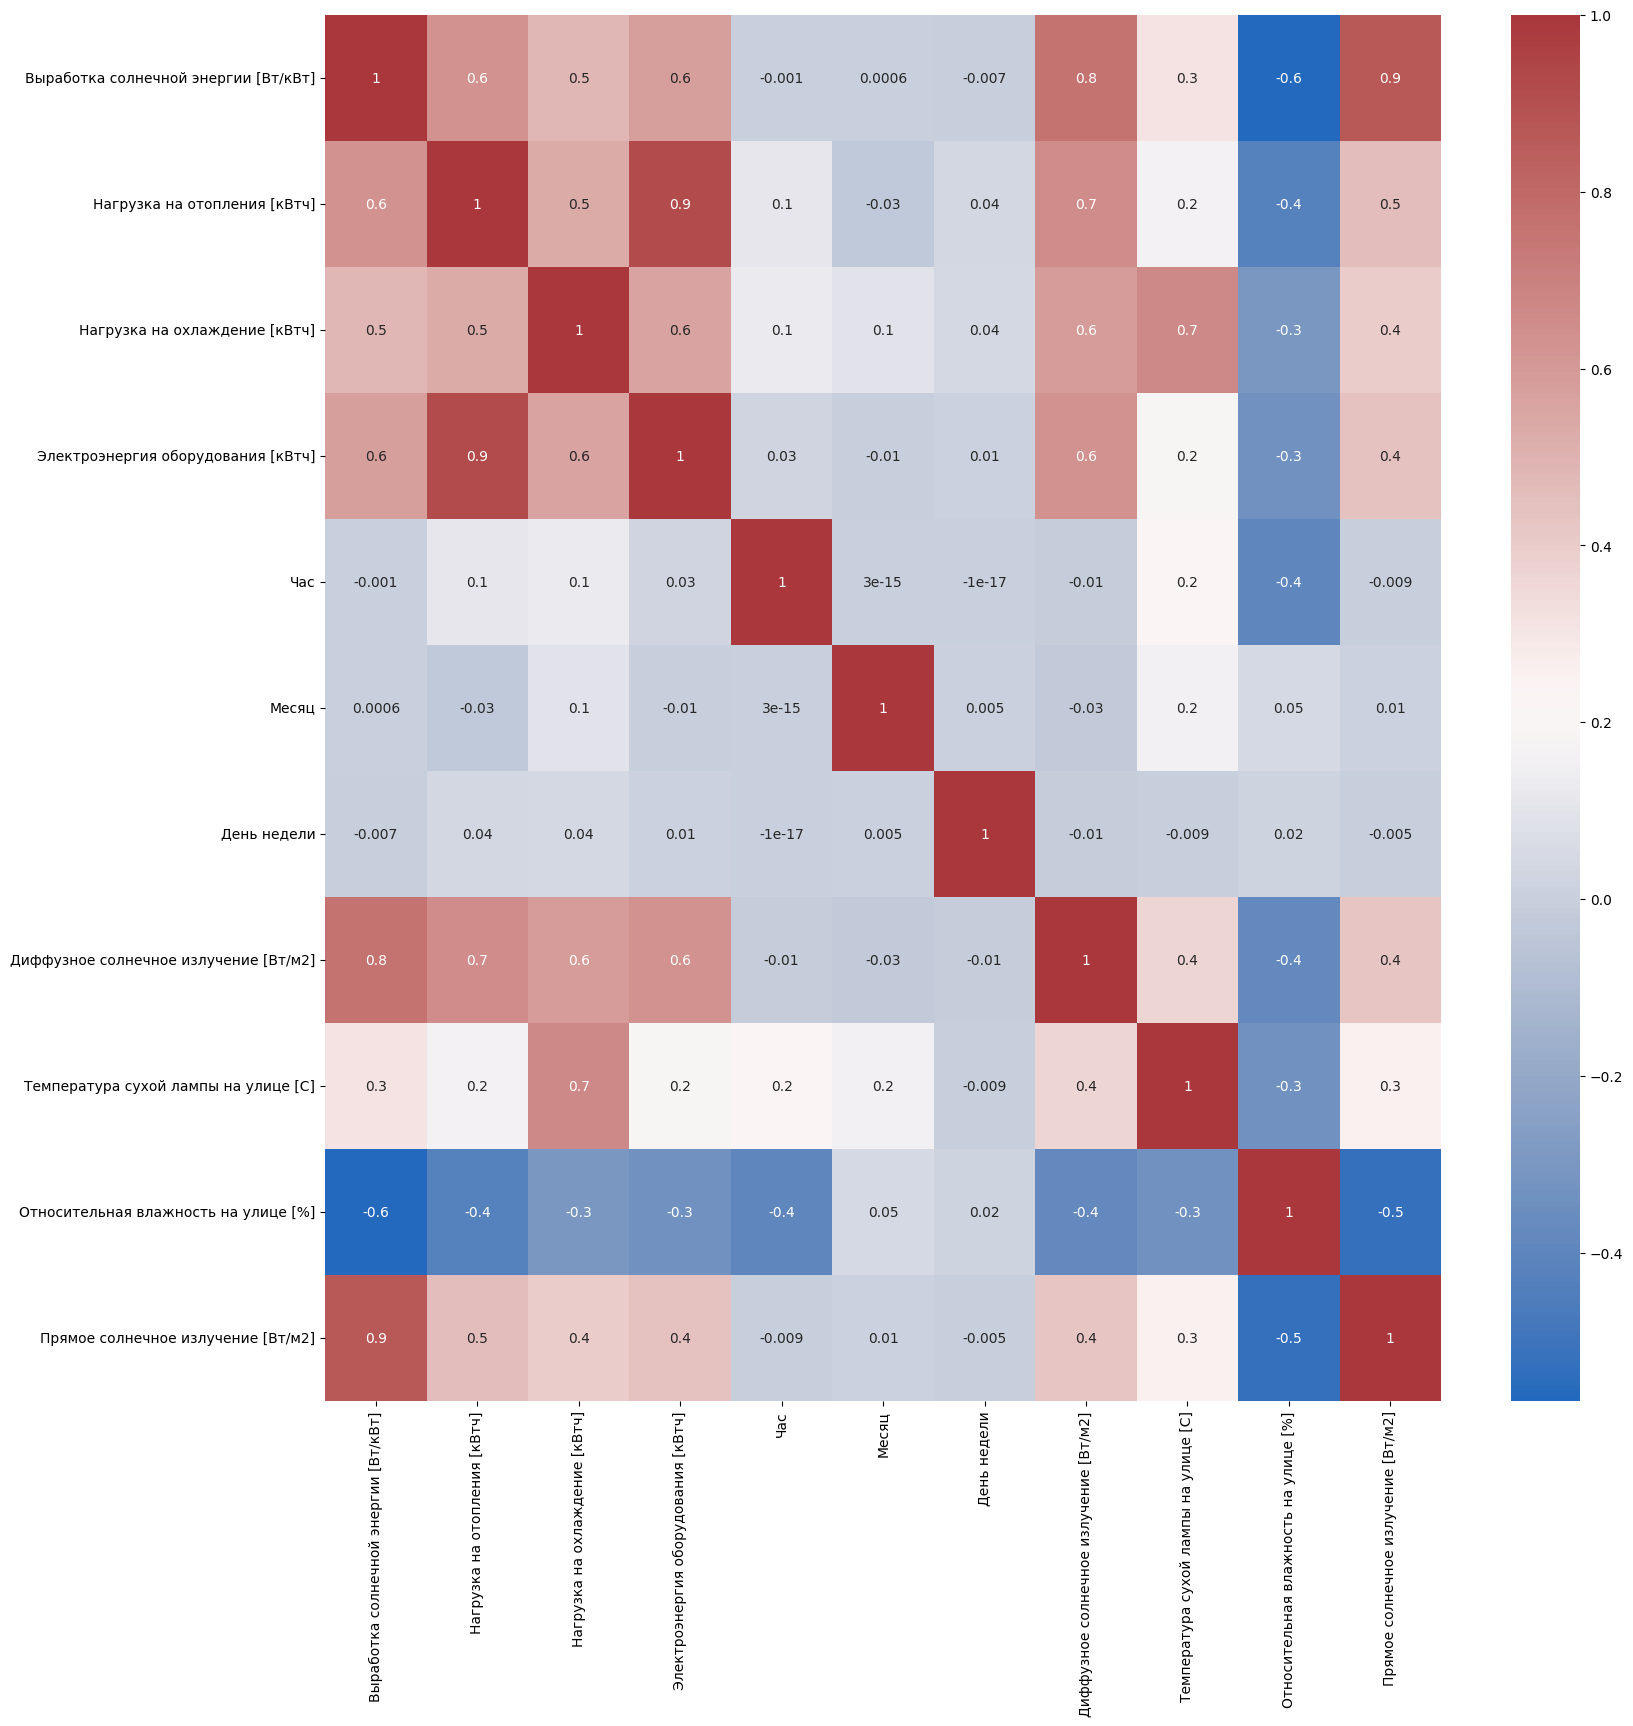

In [ ]:
plt.subplots(figsize=(18,18))
sns.heatmap(corr, annot=True, cmap="vlag", fmt='.1g')

In [ ]:
weather_data = pd.read_csv('/content/weather_data.csv')
weather_data.head(10)

Unnamed: 0  Outdoor Drybulb Temperature [C]  Outdoor Relative Humidity [%]  \
0           0                            17.81                          68.12   
1           1                            16.14                          74.75   
2           2                            16.10                          75.88   
3           3                            16.10                          78.25   
4           4                            16.16                          77.75   
5           5                            16.26                          76.38   
6           6                            16.36                          75.38   
7           7                            17.02                          73.75   
8           8                            19.02                          66.12   
9           9                            21.38                          57.00   

   Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
0                            0.00                           0.00   
1                            0.00                           0.00   
2                            0.00                           0.00   
3                            0.00                           0.00   
4                            0.00                           0.00   
5                            0.00                           0.00   
6                            0.00                           0.00   
7                           41.06                          64.50   
8                          103.88                         337.12   
9                          151.31                         434.56   

   6h Prediction Outdoor Drybulb Temperature [C]  \
0                                          16.19   
1                                          17.20   
2                                          18.76   
3                                          21.43   
4                                          23.37   
5                                          25.27   
6                                          25.53   
7                                          25.82   
8                                          25.79   
9                                          25.88   

   12h Prediction Outdoor Drybulb Temperature [C]  \
0                                           25.29   
1                                           25.96   
2                                           25.90   
3                                           26.08   
4                                           25.84   
5                                           25.01   
6                                           25.48   
7                                           23.95   
8                                           23.91   
9                                           22.94   

   24h Prediction Outdoor Drybulb Temperature [C]  \
0                                           18.31   
1                                           17.25   
2                                           15.07   
3                                           15.21   
4                                           12.91   
5                                           12.38   
6                                           12.31   
7                                           13.22   
8                                           13.02   
9                                           12.83   

   6h Prediction Outdoor Relative Humidity [%]  \
0                                        76.47   
1                                        72.65   
2                                        67.54   
3                                        56.74   
4                                        50.20   
5                                        43.76   
6                                        43.36   
7                                        41.95   
8                                        42.29   
9                                        42.98   

   12h Prediction Outdoor Relative Humidity [%]  \
0                  

In [ ]:
def resample_data(data,column_name):
  series = pd.Series(np.array(data[column_name]), pd.to_datetime(data['Time']))
  upsampled = series.resample('H')
  interpolated = upsampled.interpolate(method='linear')
  return list(interpolated)

In [ ]:
df = weather_data[['6h Prediction Diffuse Solar Radiation [W/m2]','12h Prediction Diffuse Solar Radiation [W/m2]',
              '24h Prediction Diffuse Solar Radiation [W/m2]']].T
df2 = weather_data[['6h Prediction Outdoor Drybulb Temperature [C]','12h Prediction Outdoor Drybulb Temperature [C]',
              '24h Prediction Outdoor Drybulb Temperature [C]']].T
df3 = weather_data[['6h Prediction Direct Solar Radiation [W/m2]','12h Prediction Direct Solar Radiation [W/m2]',
              '24h Prediction Direct Solar Radiation [W/m2]']].T
df4 = weather_data[['6h Prediction Outdoor Relative Humidity [%]','12h Prediction Outdoor Relative Humidity [%]',
              '24h Prediction Outdoor Relative Humidity [%]']].T
df['Time'] = ['00:00:00','12:00:00','23:00:00']  
df2['Time'] = ['00:00:00','12:00:00','23:00:00']  
df3['Time'] = ['00:00:00','12:00:00','23:00:00']  
df4['Time'] = ['00:00:00','12:00:00','23:00:00']  
data = dict(new_df[[
        'Выработка солнечной энергии [Вт/кВт]', 'Нагрузка на отопления [кВтч]','Нагрузка на охлаждение [кВтч]',
       'Электроэнергия оборудования [кВтч]']])    
df_1 = pd.DataFrame(data)  
name = [['ч Прогноз Диффузное солнечное излучение [Вт/м2]',df],['ч Прогноз Температура сухой лампы на улице [C]',df2],
 ['ч Прогноз Прямое солнечное излучение [Вт/м2]',df3],['ч Прогноз Относительная влажность на улице [%]',df4]]
for k in name:
  d = {j:[] for j in range(8760)}
  for j in range(0,8760):
    d[j] = resample_data(k[1],j)
  for i in range(1,24):
    df_1[f'{i}{k[0]}'] = [d[j][i] for j in range(8760) ]       


In [ ]:
for i in [6,12,24]:
  weather_data.rename(columns = {f'{i}h Prediction Diffuse Solar Radiation [W/m2]':f'{i}ч Прогноз Диффузное солнечное излучение [Вт/м2]', 
                                f'{i}h Prediction Outdoor Drybulb Temperature [C]':f'{i}ч Прогноз Температура сухой лампы на улице [C]',
                                f'{i}h Prediction Outdoor Relative Humidity [%]':f'{i}ч Прогноз Относительная влажность на улице [%]',
                                f'{i}h Prediction Direct Solar Radiation [W/m2]':f'{i}ч Прогноз Прямое солнечное излучение [Вт/м2]'}, inplace = True )

In [ ]:
weather_data.rename(columns = {'Diffuse Solar Radiation [W/m2]':'Диффузное солнечное излучение [Вт/м2]', 'Outdoor Drybulb Temperature [C]':'Температура сухой лампы на улице [C]',
                               "Outdoor Relative Humidity [%]":'Относительная влажность на улице [%]','Direct Solar Radiation [W/m2]':'Прямое солнечное излучение [Вт/м2]'}, inplace = True )

In [ ]:
weather_data

Unnamed: 0  Температура сухой лампы на улице [C]  \
0              0                                 17.81   
1              1                                 16.14   
2              2                                 16.10   
3              3                                 16.10   
4              4                                 16.16   
...          ...                                   ...   
8755        8755                                 13.07   
8756        8756                                 12.14   
8757        8757                                 11.18   
8758        8758                                 10.18   
8759        8759                                  9.18   

      Относительная влажность на улице [%]  \
0                                    68.12   
1                                    74.75   
2                                    75.88   
3                                    78.25   
4                                    77.75   
...                                    ...   
8755                                 82.50   
8756                                 85.88   
8757                                 91.38   
8758                                 97.75   
8759                                100.00   

      Диффузное солнечное излучение [Вт/м2]  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
8755                                    0.0   
8756                                    0.0   
8757                                    0.0   
8758                                    0.0   
8759                                    0.0   

      Прямое солнечное излучение [Вт/м2]  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
...                                  ...   
8755                                 0.0   
8756                                 0.0   
8757                                 0.0   
8758                                 0.0   
8759                                 0.0   

      6ч Прогноз Температура сухой лампы на улице [C]  \
0                                               16.19   
1                                               17.20   
2                                               18.76   
3                                               21.43   
4                                               23.37   
...                                               ...   
8755                                            12.27   
8756                                            11.94   
8757                                            10.85   
8758                                            10.70   
8759                                            10.59   

      12ч Прогноз Температура сухой лампы на улице [C]  \
0                                                25.29   
1                                                25.96   
2                                                25.90   
3                                                26.08   
4                                                25.84   
...                                                ...   
8755                                             10.88   
8756                                             10.43   
8757                                             11.33   
8758                                             11.23   
8759                                             13.12   

      24ч Прогноз Температура сухой лампы на улице [C]  \
0                                                18.31   
1                                                17.25   
2                                                15.07   
3                                               

In [ ]:
def print_metrics(series, forecast, model_name):
    mae_ =  mean_absolute_error(series, forecast)
    rmse_ = mean_squared_error(series, forecast)
    mape_ =  mean_absolute_percentage_error(series, forecast)
    r2_score_ = r2_score(series, forecast)
    
    dict_ = {'MAE': mae_, 'RMSE': rmse_,
             'MAPE': mape_,
             'R2': r2_score_}
    
    df = pd.DataFrame(dict_, index = [model_name])
    
    return(df)  

In [ ]:
weather_data_prep = pd.DataFrame.from_dict({'6ч Диффузное солнечное излучение [Вт/м2]': list(weather_data.iloc[[i+6 for i in range(len(weather_data)-6)]]['Диффузное солнечное излучение [Вт/м2]'].head(24)),
                                            '6ч Прогноз Диффузное солнечное излучение [Вт/м2]':list(weather_data['6ч Прогноз Диффузное солнечное излучение [Вт/м2]'].head(24)),
                                            '12ч Диффузное солнечное излучение [Вт/м2]': list(weather_data.iloc[[i+12 for i in range(len(weather_data)-12)]]['Диффузное солнечное излучение [Вт/м2]'].head(24)),
                                            '12ч Прогноз Диффузное солнечное излучение [Вт/м2]':list(weather_data['12ч Прогноз Диффузное солнечное излучение [Вт/м2]'].head(24)),
                                            '24ч Диффузное солнечное излучение [Вт/м2]': list(weather_data.iloc[[i+24 for i in range(len(weather_data)-24)]]['Диффузное солнечное излучение [Вт/м2]'].head(24)),
                                            '24ч Прогноз Диффузное солнечное излучение [Вт/м2]':list(weather_data['24ч Прогноз Диффузное солнечное излучение [Вт/м2]'].head(24))})

<Axes: >

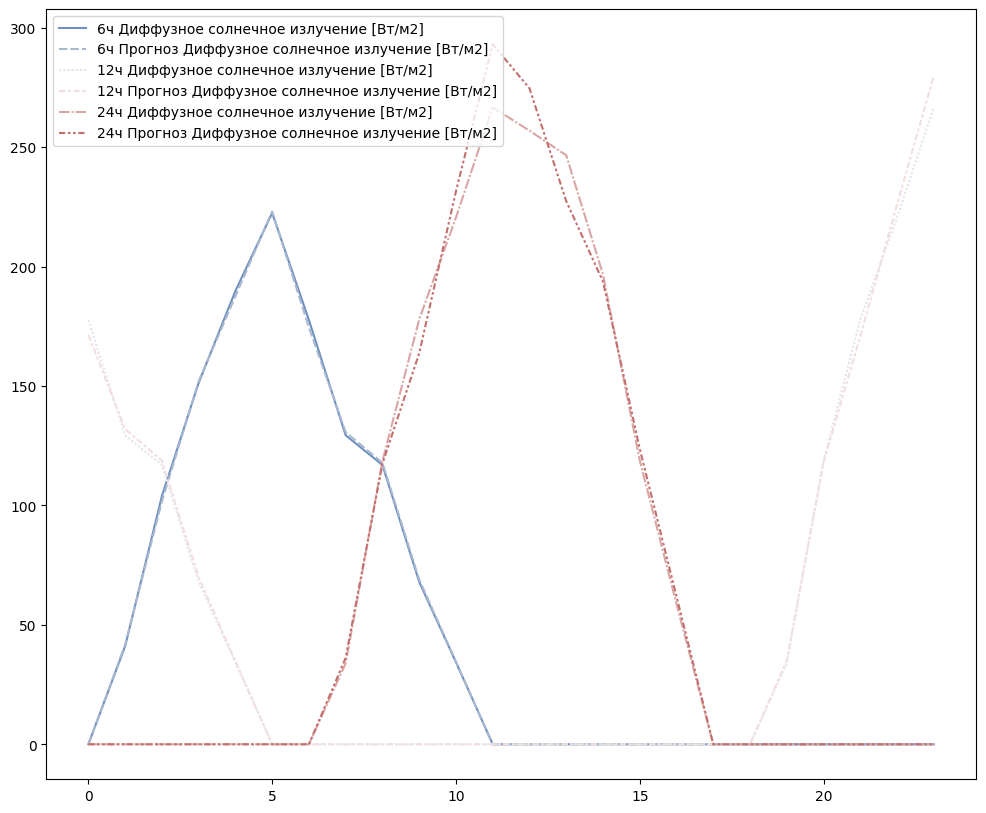

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=weather_data_prep,palette = 'vlag')

In [ ]:
print_metrics(list(weather_data.iloc[[i+6 for i in range(len(weather_data)-6)]]['Диффузное солнечное излучение [Вт/м2]'].head(24*20)), 
                  list(weather_data['6ч Прогноз Диффузное солнечное излучение [Вт/м2]'].head(24*20)), 'Диффузное солнечное излучение [Вт/м2]')

MAE      RMSE      MAPE        R2
Диффузное солнечное излучение [Вт/м2]  0.636292  1.820166  0.005534  0.999681

In [ ]:
print_metrics(list(weather_data.iloc[[i+12 for i in range(len(weather_data)-12)]]['Диффузное солнечное излучение [Вт/м2]'].head(24*20)), 
                  list(weather_data['12ч Прогноз Диффузное солнечное излучение [Вт/м2]'].head(24*20)), 'Диффузное солнечное излучение [Вт/м2]')

MAE      RMSE      MAPE        R2
Диффузное солнечное излучение [Вт/м2]  1.278896  7.387831  0.011078  0.998702

In [ ]:
print_metrics(list(weather_data.iloc[[i+24 for i in range(len(weather_data)-24)]]['Диффузное солнечное излучение [Вт/м2]'].head(24*20)), 
                  list(weather_data['24ч Прогноз Диффузное солнечное излучение [Вт/м2]'].head(24*20)), 'Диффузное солнечное излучение [Вт/м2]')

MAE       RMSE     MAPE        R2
Диффузное солнечное излучение [Вт/м2]  2.587188  30.164054  0.02237  0.994766

In [ ]:
weather_data_prep = pd.DataFrame.from_dict({'6ч Температура сухой лампы на улице [C]': list(weather_data.iloc[[i+6 for i in range(len(weather_data)-6)]]['Температура сухой лампы на улице [C]'].head(24)),
                                            '6ч Прогноз Температура сухой лампы на улице [C]':list(weather_data['6ч Прогноз Температура сухой лампы на улице [C]'].head(24)),
                                            '12ч Температура сухой лампы на улице [C]': list(weather_data.iloc[[i+12 for i in range(len(weather_data)-12)]]['Температура сухой лампы на улице [C]'].head(24)),
                                            '12ч Прогноз Температура сухой лампы на улице [C]':list(weather_data['12ч Прогноз Температура сухой лампы на улице [C]'].head(24)),
                                            '24ч Температура сухой лампы на улице [C]': list(weather_data.iloc[[i+24 for i in range(len(weather_data)-24)]]['Температура сухой лампы на улице [C]'].head(24)),
                                            '24ч Прогноз Температура сухой лампы на улице [C]':list(weather_data['24ч Прогноз Температура сухой лампы на улице [C]'].head(24))})

<Axes: >

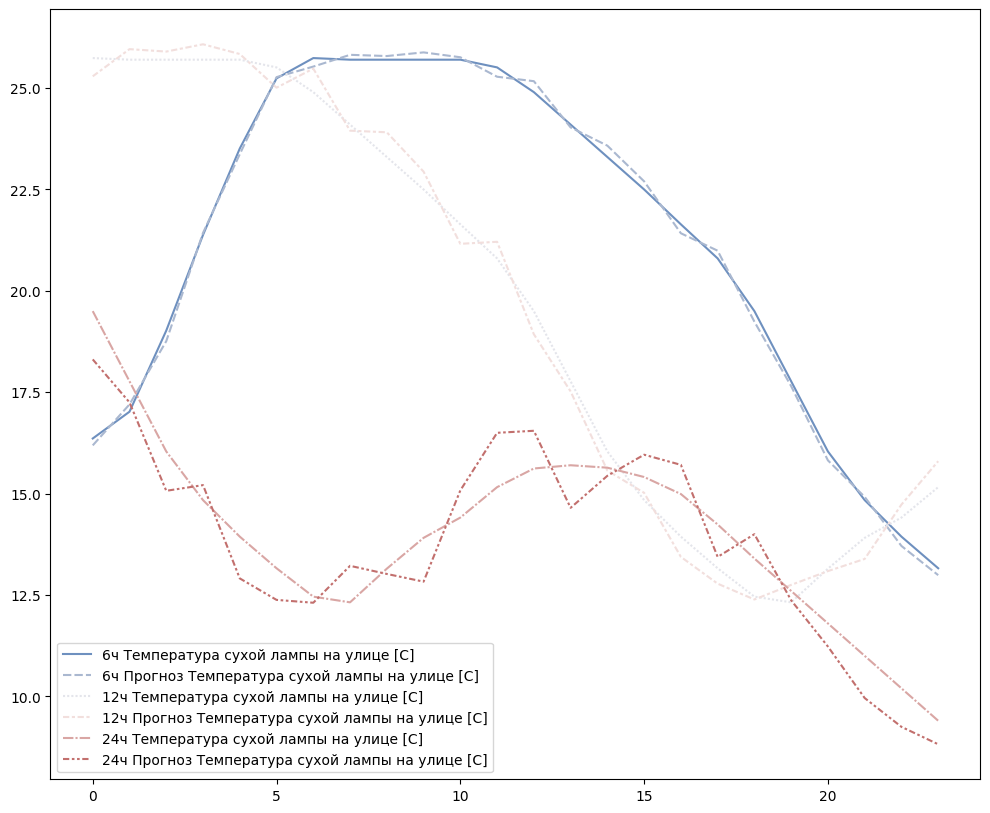

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=weather_data_prep,palette = 'vlag')

In [ ]:
print_metrics(list(weather_data.iloc[[i+6 for i in range(len(weather_data)-6)]]['Температура сухой лампы на улице [C]'].head(24*20)), 
                  list(weather_data['6ч Прогноз Температура сухой лампы на улице [C]'].head(24*20)), 'Температура сухой лампы на улице [C]')

MAE      RMSE      MAPE        R2
Температура сухой лампы на улице [C]  0.146896  0.028936  0.049107  0.999017

In [ ]:
print_metrics(list(weather_data.iloc[[i+12 for i in range(len(weather_data)-12)]]['Температура сухой лампы на улице [C]'].head(24*20)), 
                  list(weather_data['12ч Прогноз Температура сухой лампы на улице [C]'].head(24*20)), 'Температура сухой лампы на улице [C]')

MAE      RMSE      MAPE        R2
Температура сухой лампы на улице [C]  0.317396  0.135327  0.106317  0.995276

In [ ]:
print_metrics(list(weather_data.iloc[[i+24 for i in range(len(weather_data)-24)]]['Температура сухой лампы на улице [C]'].head(24*20)), 
                  list(weather_data['24ч Прогноз Температура сухой лампы на улице [C]'].head(24*20)), 'Температура сухой лампы на улице [C]')

MAE     RMSE      MAPE        R2
Температура сухой лампы на улице [C]  0.655792  0.57928  0.220357  0.977326

In [ ]:
weather_data_prep = pd.DataFrame.from_dict({'6ч Относительная влажность на улице [%]': list(weather_data.iloc[[i+6 for i in range(len(weather_data)-6)]]['Относительная влажность на улице [%]'].head(24)),
                                            '6ч Прогноз Относительная влажность на улице [%]':list(weather_data['6ч Прогноз Относительная влажность на улице [%]'].head(24)),
                                            '12ч Относительная влажность на улице [%]': list(weather_data.iloc[[i+12 for i in range(len(weather_data)-12)]]['Относительная влажность на улице [%]'].head(24)),
                                            '12ч Прогноз Относительная влажность на улице [%]':list(weather_data['12ч Прогноз Относительная влажность на улице [%]'].head(24)),
                                            '24ч Относительная влажность на улице [%]': list(weather_data.iloc[[i+24 for i in range(len(weather_data)-24)]]['Относительная влажность на улице [%]'].head(24)),
                                            '24ч Прогноз Относительная влажность на улице [%]':list(weather_data['24ч Прогноз Относительная влажность на улице [%]'].head(24))})

<Axes: >

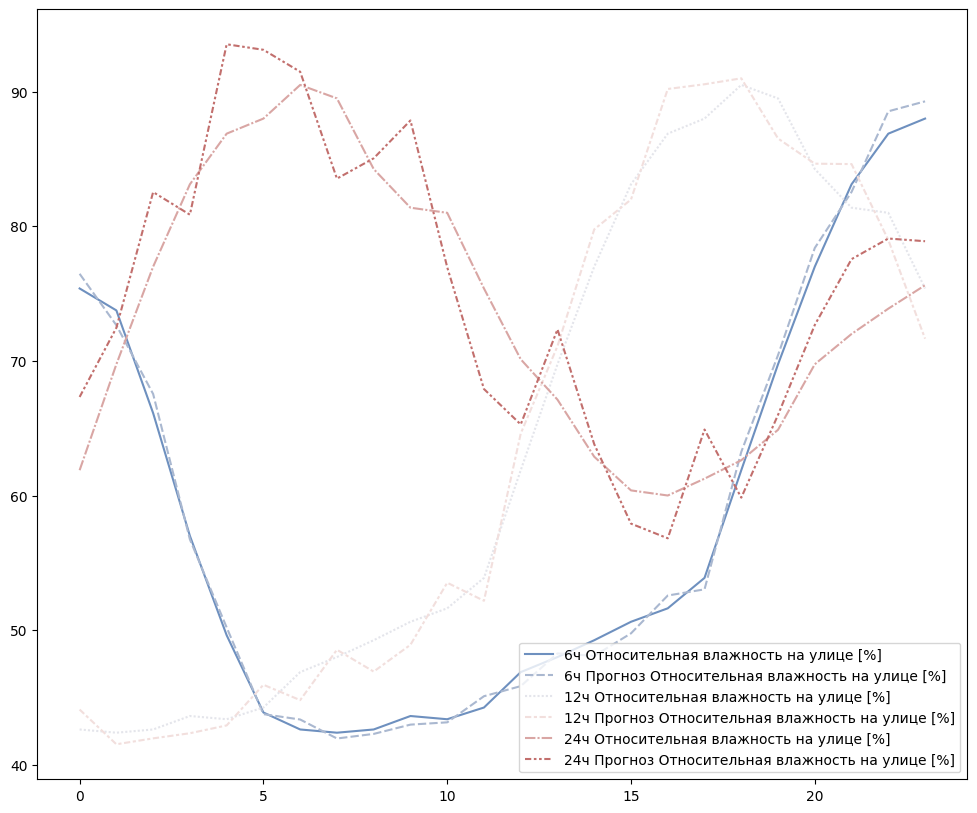

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=weather_data_prep,palette = 'vlag')

In [ ]:
print_metrics(list(weather_data.iloc[[i+6 for i in range(len(weather_data)-6)]]['Относительная влажность на улице [%]'].head(24*20)), 
                  list(weather_data['6ч Прогноз Относительная влажность на улице [%]'].head(24*20)), 'Относительная влажность на улице [%]')

MAE      RMSE      MAPE        R2
Относительная влажность на улице [%]  0.858875  1.042245  0.012151  0.996382

In [ ]:
print_metrics(list(weather_data.iloc[[i+12 for i in range(len(weather_data)-12)]]['Относительная влажность на улице [%]'].head(24*20)), 
                  list(weather_data['12ч Прогноз Относительная влажность на улице [%]'].head(24*20)), 'Относительная влажность на улице [%]')

MAE     RMSE      MAPE        R2
Относительная влажность на улице [%]  1.710729  4.13129  0.024163  0.985724

In [ ]:
print_metrics(list(weather_data.iloc[[i+24 for i in range(len(weather_data)-24)]]['Относительная влажность на улице [%]'].head(24*20)), 
                  list(weather_data['24ч Прогноз Относительная влажность на улице [%]'].head(24*20)), 'Относительная влажность на улице [%]')

MAE       RMSE      MAPE        R2
Относительная влажность на улице [%]  3.397896  16.208169  0.047631  0.940707

In [ ]:
weather_data_prep = pd.DataFrame.from_dict({'6ч Прямое солнечное излучение [Вт/м2]': list(weather_data.iloc[[i+6 for i in range(len(weather_data)-6)]]['Прямое солнечное излучение [Вт/м2]'].head(24)),
                                            '6ч Прогноз Прямое солнечное излучение [Вт/м2]':list(weather_data['6ч Прогноз Прямое солнечное излучение [Вт/м2]'].head(24)),
                                            '12ч Прямое солнечное излучение [Вт/м2]': list(weather_data.iloc[[i+12 for i in range(len(weather_data)-12)]]['Прямое солнечное излучение [Вт/м2]'].head(24)),
                                            '12ч Прогноз Прямое солнечное излучение [Вт/м2]':list(weather_data['12ч Прогноз Прямое солнечное излучение [Вт/м2]'].head(24)),
                                            '24ч Прямое солнечное излучение [Вт/м2]': list(weather_data.iloc[[i+24 for i in range(len(weather_data)-24)]]['Прямое солнечное излучение [Вт/м2]'].head(24)),
                                            '24ч Прогноз Прямое солнечное излучение [Вт/м2]':list(weather_data['24ч Прогноз Прямое солнечное излучение [Вт/м2]'].head(24))})

<Axes: >

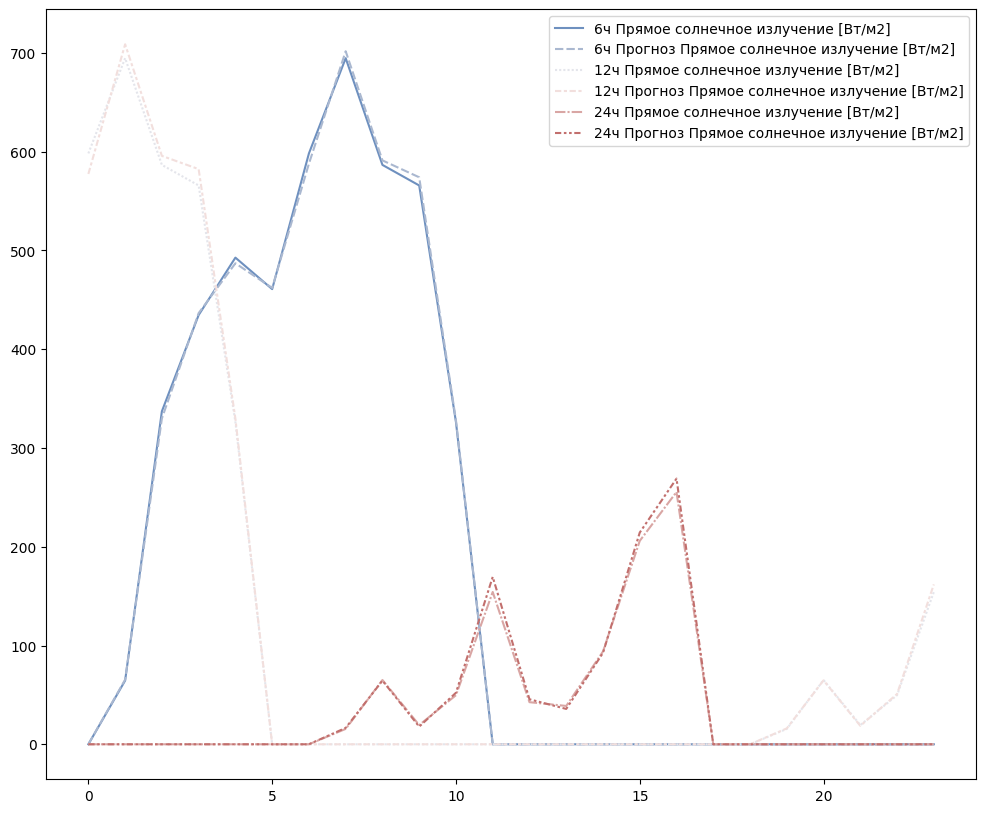

In [ ]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=weather_data_prep,palette = 'vlag')

In [ ]:
print_metrics(list(weather_data.iloc[[i+6 for i in range(len(weather_data)-6)]]['Прямое солнечное излучение [Вт/м2]'].head(24*20)), 
                  list(weather_data['6ч Прогноз Прямое солнечное излучение [Вт/м2]'].head(24*20)), 'Прямое солнечное излучение [Вт/м2]')

MAE      RMSE     MAPE        R2
Прямое солнечное излучение [Вт/м2]  1.655396  18.01357  0.00458  0.999726

In [ ]:
print_metrics(list(weather_data.iloc[[i+12 for i in range(len(weather_data)-12)]]['Прямое солнечное излучение [Вт/м2]'].head(24*20)), 
                  list(weather_data['12ч Прогноз Прямое солнечное излучение [Вт/м2]'].head(24*20)), 'Прямое солнечное излучение [Вт/м2]')

MAE       RMSE      MAPE        R2
Прямое солнечное излучение [Вт/м2]  3.240333  71.290163  0.009093  0.998906

In [ ]:
print_metrics(list(weather_data.iloc[[i+24 for i in range(len(weather_data)-24)]]['Прямое солнечное излучение [Вт/м2]'].head(24*20)), 
                  list(weather_data['24ч Прогноз Прямое солнечное излучение [Вт/м2]'].head(24*20)), 'Прямое солнечное излучение [Вт/м2]')

MAE        RMSE      MAPE        R2
Прямое солнечное излучение [Вт/м2]  6.216063  276.833884  0.018337  0.995624

In [ ]:
import random

In [ ]:
np.random.seed(365)
noise1 = np.random.normal(0, 3, len(building_data))
noise2 = np.random.normal(0, 7, len(building_data))
noise3 = np.random.normal(0, 8, len(building_data))
noise4 = np.random.normal(0, 10, len(building_data))
data_ = building_data['Электроэнергия оборудования [кВтч]']
building_data_prep = pd.DataFrame.from_dict({
    'Электроэнергия оборудования [кВтч]': data_,
    'Прогноз R2 = 0.9':np.clip(data_ + noise1,0,100000),
    'Прогноз R2 = 0.8':np.clip(data_ + noise2,0,100000),
    'Прогноз R2 = 0.7':np.clip(data_+ noise3,0,100000),
    'Прогноз R2 = 0.6':np.clip(data_+ noise4,0,100000)})

In [ ]:
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.9'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.8'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.7'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.6'], 'Прогноз'))

MAE      RMSE      MAPE        R2
Прогноз  2.374188  8.891547  0.140143  0.969558

MAE       RMSE      MAPE        R2
Прогноз  5.508857  46.689535  0.324814  0.840151

MAE       RMSE      MAPE        R2
Прогноз  6.259549  60.380248  0.366751  0.793279

MAE       RMSE      MAPE        R2
Прогноз  7.564912  88.287877  0.437989  0.697733

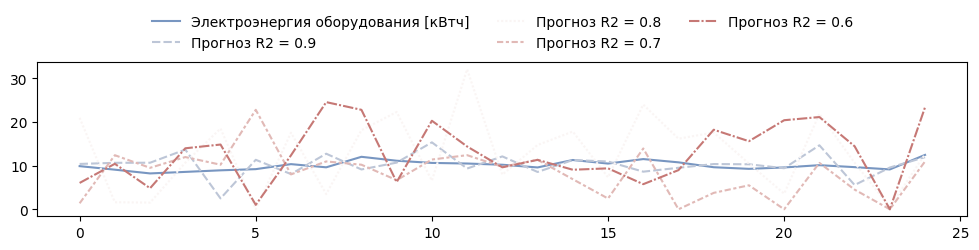

In [ ]:
plt.subplots(figsize=(12, 2))
ax = sns.lineplot(data=building_data_prep.head(25),palette = 'vlag')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

In [ ]:
np.random.seed(365)
noise1 = np.random.normal(0, 0.5, len(building_data))
noise2 = np.random.normal(0, 0.7, len(building_data))
noise3 = np.random.normal(0, 0.8, len(building_data))
noise4 = np.random.normal(0, 0.9, len(building_data))
data_ = building_data['Нагрузка на отопления [кВтч]']
building_data_prep = pd.DataFrame.from_dict({
    'Нагрузка на отопления [кВтч]': data_,
    'Прогноз R2 = 0.9':np.clip(data_ + noise1,0,100000),
    'Прогноз R2 = 0.8':np.clip(data_ + noise2,0,100000),
    'Прогноз R2 = 0.7':np.clip(data_+ noise3,0,100000),
    'Прогноз R2 = 0.6':np.clip(data_+ noise4,0,100000)})

In [ ]:
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.9'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.8'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.7'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.6'], 'Прогноз'))

MAE      RMSE          MAPE       R2
Прогноз  0.323098  0.195832  2.883755e+14  0.91784

MAE      RMSE          MAPE       R2
Прогноз  0.446027  0.370308  3.996456e+14  0.84464

MAE      RMSE          MAPE        R2
Прогноз  0.50822  0.485713  4.722605e+14  0.796222

MAE      RMSE          MAPE        R2
Прогноз  0.552349  0.584544  4.903637e+14  0.754758

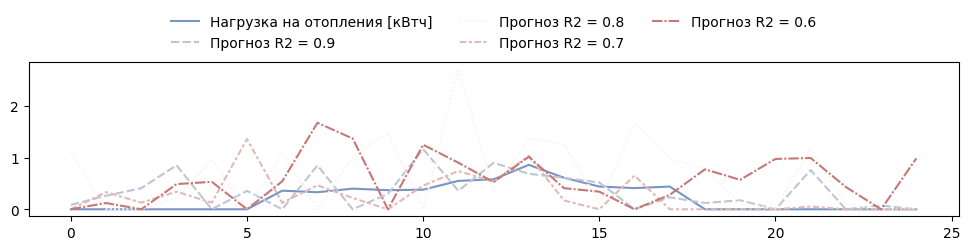

In [ ]:
plt.subplots(figsize=(12, 2))
ax = sns.lineplot(data=building_data_prep.head(25),palette = 'vlag')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

In [ ]:
np.random.seed(365)
noise1 = np.random.normal(0, 20, len(building_data))
noise2 = np.random.normal(0,28, len(building_data))
noise3 = np.random.normal(0, 37, len(building_data))
noise4 = np.random.normal(0,48, len(building_data))
data_ = building_data['Нагрузка на охлаждение [кВтч]']
building_data_prep = pd.DataFrame.from_dict({
    'Нагрузка на охлаждение [кВтч]': data_,
    'Прогноз R2 = 0.9':np.clip(data_ + noise1,0,100000),
    'Прогноз R2 = 0.8':np.clip(data_ + noise2,0,100000),
    'Прогноз R2 = 0.7':np.clip(data_+ noise3,0,100000),
    'Прогноз R2 = 0.6':np.clip(data_+ noise4,0,100000)})

In [ ]:
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.9'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.8'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.7'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.6'], 'Прогноз'))

MAE        RMSE          MAPE        R2
Прогноз  11.965386  295.426587  1.672063e+16  0.950472

MAE       RMSE          MAPE        R2
Прогноз  16.784791  575.28872  2.367721e+16  0.903554

MAE         RMSE          MAPE        R2
Прогноз  22.349148  1018.947927  3.176451e+16  0.829176

MAE         RMSE          MAPE        R2
Прогноз  27.68431  1610.032295  3.786851e+16  0.730082

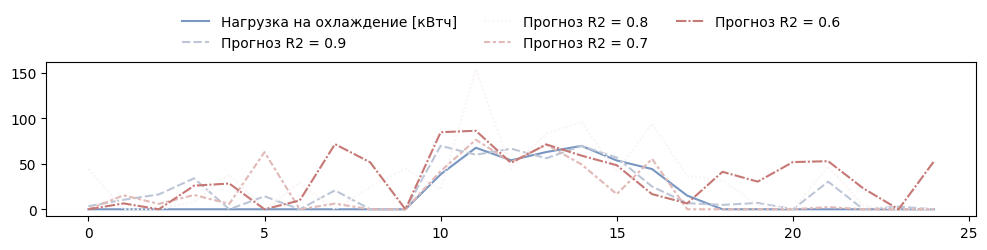

In [ ]:
plt.subplots(figsize=(12, 2))
ax = sns.lineplot(data=building_data_prep.head(25),palette = 'vlag')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

In [ ]:
np.random.seed(365)
noise1 = np.random.normal(0, 80, len(building_data))
noise2 = np.random.normal(0,120, len(building_data))
noise3 = np.random.normal(0, 150, len(building_data))
noise4 = np.random.normal(0,170, len(building_data))
data_ = building_data['Выработка солнечной энергии [Вт/кВт]']
building_data_prep = pd.DataFrame.from_dict({
    'Выработка солнечной энергии [Вт/кВт]': data_,
    'Прогноз R2 = 0.9':np.clip(data_ + noise1,0,100000),
    'Прогноз R2 = 0.8':np.clip(data_ + noise2,0,100000),
    'Прогноз R2 = 0.7':np.clip(data_+ noise3,0,100000),
    'Прогноз R2 = 0.6':np.clip(data_+ noise4,0,100000)})

In [ ]:
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.9'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.8'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.7'], 'Прогноз'))
display(print_metrics(data_,building_data_prep['Прогноз R2 = 0.6'], 'Прогноз'))

MAE        RMSE          MAPE        R2
Прогноз  45.122242  4418.34151  7.367156e+16  0.910714

MAE         RMSE          MAPE        R2
Прогноз  67.054439  9691.499509  1.109073e+17  0.804155

MAE          RMSE          MAPE       R2
Прогноз  84.402762  15408.309577  1.414352e+17  0.68863

MAE          RMSE          MAPE        R2
Прогноз  90.995506  18496.223208  1.453538e+17  0.626229

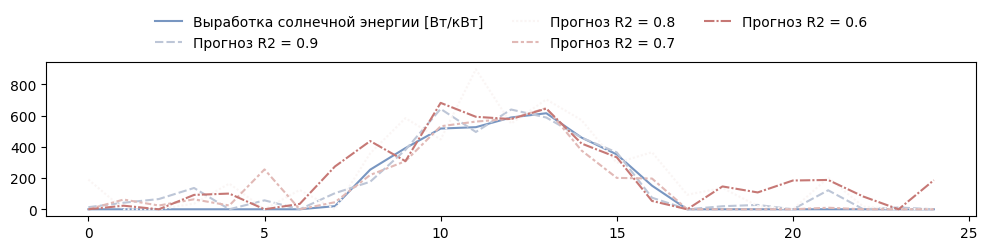

In [ ]:
plt.subplots(figsize=(12, 2))
ax = sns.lineplot(data=building_data_prep.head(25),palette = 'vlag')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

#MARL model v1

In [ ]:
building_data = pd.read_csv('/content/Building_1.csv')
building_data.head()

Month  Hour  Day Type  Daylight Savings Status  Indoor Temperature [C]  \
0      1     1         8                        0                   23.77   
1      1     2         8                        0                   23.59   
2      1     3         8                        0                   23.50   
3      1     4         8                        0                   23.41   
4      1     5         8                        0                   23.34   

   Average Unmet Cooling Setpoint Difference [C]  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Indoor Relative Humidity [%]  Equipment Electric Power [kWh]  \
0                         42.87                            9.89   
1                         43.49                            9.08   
2                         43.82                            8.22   
3                         44.15                            8.57   
4                         44.49                            8.93   

   DHW Heating [kWh]  Cooling Load [kWh]  Heating Load [kWh]  \
0                0.0                 0.0                 0.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   Solar Generation [W/kW]  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

In [ ]:
building_data.describe()

Month         Hour     Day Type  Daylight Savings Status  \
count  8760.000000  8760.000000  8760.000000              8760.000000   
mean      6.526027    12.500000     4.134247                 0.654795   
std       3.448048     6.922582     2.077012                 0.475462   
min       1.000000     1.000000     1.000000                 0.000000   
25%       4.000000     6.750000     2.000000                 0.000000   
50%       7.000000    12.500000     4.000000                 1.000000   
75%      10.000000    18.250000     6.000000                 1.000000   
max      12.000000    24.000000     8.000000                 1.000000   

       Indoor Temperature [C]  Average Unmet Cooling Setpoint Difference [C]  \
count             8760.000000                                    8760.000000   
mean                23.339247                                       0.003623   
std                  1.477051                                       0.016137   
min                 17.970000                                       0.000000   
25%                 22.250000                                       0.000000   
50%                 23.650000                                       0.000000   
75%                 24.332500                                       0.000000   
max                 26.340000                                       0.270000   

       Indoor Relative Humidity [%]  Equipment Electric Power [kWh]  \
count                   8760.000000                     8760.000000   
mean                      46.658108                       24.833749   
std                        6.566333                       17.091484   
min                       21.130000                        7.440000   
25%                       43.667500                       12.090000   
50%                       47.860000                       15.880000   
75%                       50.470000                       42.620000   
max                       67.460000                       70.910000   

       DHW Heating [kWh]  Cooling Load [kWh]  Heating Load [kWh]  \
count        8760.000000         8760.000000              8760.0   
mean            1.387148           63.064034                 0.0   
std             1.543961           77.237163                 0.0   
min             0.000000            0.000000                 0.0   
25%             0.000000            0.000000                 0.0   
50%             0.660000           19.110000                 0.0   
75%             2.480000          115.637500                 0.0   
max             6.590000          299.230000                 0.0   

       Solar Generation [W/kW]  
count              8760.000000  
mean                154.760241  
std                 222.466040  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                 274.810500  
max                 830.630000

In [ ]:
building_data = pd.read_csv('/content/weather.csv')
building_data.head()

Outdoor Drybulb Temperature [C]  Outdoor Relative Humidity [%]  \
0                            17.81                          68.12   
1                            16.14                          74.75   
2                            16.10                          75.88   
3                            16.10                          78.25   
4                            16.16                          77.75   

   Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   6h Prediction Outdoor Drybulb Temperature [C]  \
0                                          16.19   
1                                          17.20   
2                                          18.76   
3                                          21.43   
4                                          23.37   

   12h Prediction Outdoor Drybulb Temperature [C]  \
0                                           25.29   
1                                           25.96   
2                                           25.90   
3                                           26.08   
4                                           25.84   

   24h Prediction Outdoor Drybulb Temperature [C]  \
0                                           18.31   
1                                           17.25   
2                                           15.07   
3                                           15.21   
4                                           12.91   

   6h Prediction Outdoor Relative Humidity [%]  \
0                                        76.47   
1                                        72.65   
2                                        67.54   
3                                        56.74   
4                                        50.20   

   12h Prediction Outdoor Relative Humidity [%]  \
0                                         44.10   
1                                         41.52   
2                                         41.96   
3                                         42.34   
4                                         42.92   

   24h Prediction Outdoor Relative Humidity [%]  \
0                                         67.32   
1                                         72.46   
2                                         82.54   
3                                         80.86   
4                                         93.52   

   6h Prediction Diffuse Solar Radiation [W/m2]  \
0                                          0.00   
1                                         41.67   
2                                        101.65   
3                                        151.99   
4                                        187.61   

   12h Prediction Diffuse Solar Radiation [W/m2]  \
0                                         171.45   
1                                         132.00   
2                                         118.76   
3                                          69.99   
4                                          34.75   

   24h Prediction Diffuse Solar Radiation [W/m2]  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   6h Prediction Direct Solar Radiation [W/m2]  \
0                                         0.00   
1                                        65.46   
2                                       329.89   
3                                       436.51   
4                                       486.97   

   12h Prediction Direct Solar Radiation [W/m2]  \
0                           

In [ ]:
from citylearn.citylearn import CityLearnEnv
from citylearn.utilities import read_json
from citylearn.agents.rbc import BasicRBC as RBCAgent

schema_filepath = '/content/schema.json'
schema = read_json(schema_filepath)
env = CityLearnEnv(
    schema,
    root_directory='/content/',
    central_agent=True
)

In [ ]:
print('Current time step:', env.time_step)
print('environment number of time steps:', env.time_steps)
print('environment uses central agent:', env.central_agent)
print('Common (shared) observations amogst buildings:', env.shared_observations)
print('Number of buildings:', len(env.buildings))

Current time step: 0
environment number of time steps: 8760
environment uses central agent: True
Common (shared) observations amogst buildings: ['month', 'day_type', 'hour', 'outdoor_dry_bulb_temperature', 'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 'outdoor_relative_humidity', 'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 'diffuse_solar_irradiance', 'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 'direct_solar_irradiance', 'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h', 'carbon_intensity']
Number of buildings: 1


In [ ]:
model = RBCAgent(env)
model.learn(episodes=1)

In [ ]:
observations = env.reset()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.predict(observations)

[[0.091, 0.091]]

In [ ]:
for n, nd in env.evaluate().groupby('name'):
    nd = nd.pivot(index='name', columns='cost_function', values='value').round(3)
    print(n, ':', nd.to_dict('records'))

Building_1 : [{'carbon_emissions': nan, 'cost': 0.966, 'electricity_consumption': 1.052, 'zero_net_energy': 1.012}]
District : [{'1 - load_factor': 0.994, 'average_daily_peak': 1.031, 'carbon_emissions': nan, 'cost': 0.966, 'electricity_consumption': 1.052, 'peak_demand': 1.003, 'ramping': 1.202, 'zero_net_energy': 1.012}]


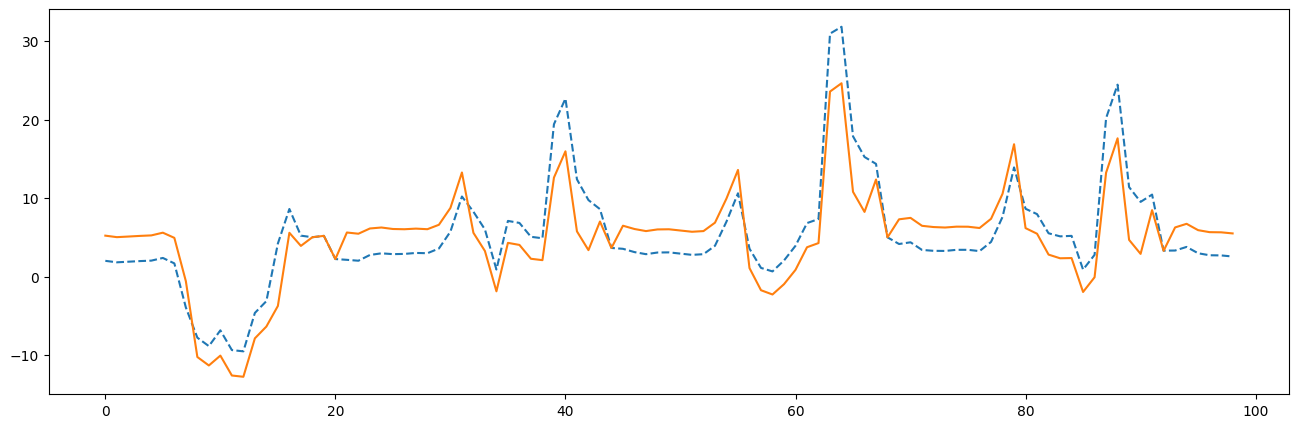

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(env.net_electricity_consumption_without_storage_cost[1:100], '--')
plt.plot(env.net_electricity_consumption_cost[1:100])

In [ ]:
from citylearn.citylearn import CityLearnEnv
from citylearn.agents.sac import SAC as RLAgent

In [ ]:
from citylearn.citylearn import CityLearnEnv
from citylearn.utilities import read_json
from citylearn.agents.rbc import BasicRBC as RBCAgent

schema_filepath = '/content/schema.json'
schema = read_json(schema_filepath)
env = CityLearnEnv(
    schema,
    root_directory='/content/',
    central_agent=True
)

In [ ]:
model = RLAgent(env)
model.learn(episodes=2, deterministic_finish=True)#log_interval=4

In [ ]:
for n, nd in env.evaluate().groupby('name'):
    nd = nd.pivot(index='name', columns='cost_function', values='value').round(3)
    print(n, ':', nd.to_dict('records'))

Building_1 : [{'carbon_emissions': nan, 'cost': 0.979, 'electricity_consumption': 1.003, 'zero_net_energy': 1.013}]
District : [{'1 - load_factor': 1.015, 'average_daily_peak': 1.008, 'carbon_emissions': nan, 'cost': 0.979, 'electricity_consumption': 1.003, 'peak_demand': 1.0, 'ramping': 1.165, 'zero_net_energy': 1.013}]


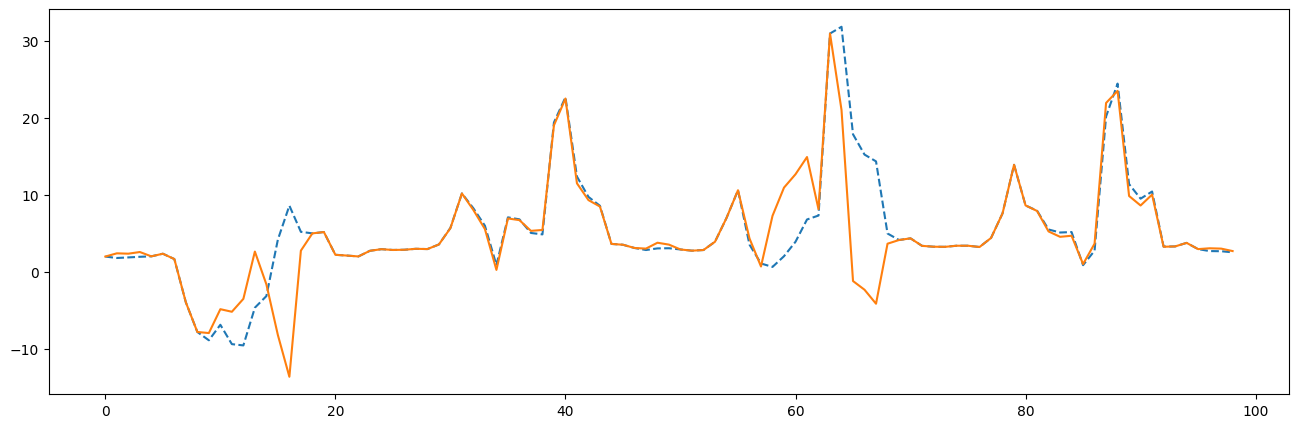

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(env.net_electricity_consumption_without_storage_cost[1:100], '--')
plt.plot(env.net_electricity_consumption_cost[1:100])

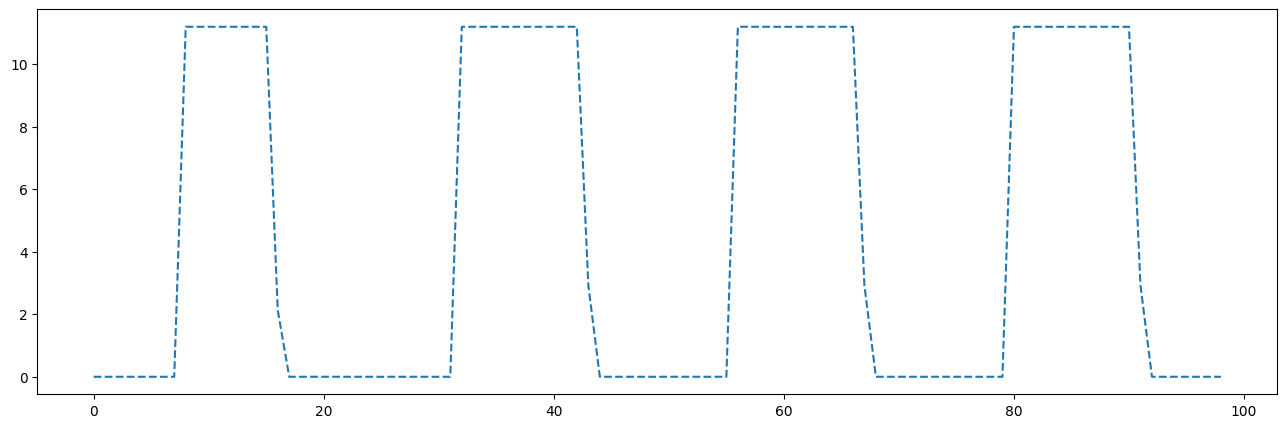

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(env.energy_from_electrical_storage[1:100], '--')

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(env.cooling_storage_electricity_consumption[100:200], '--')

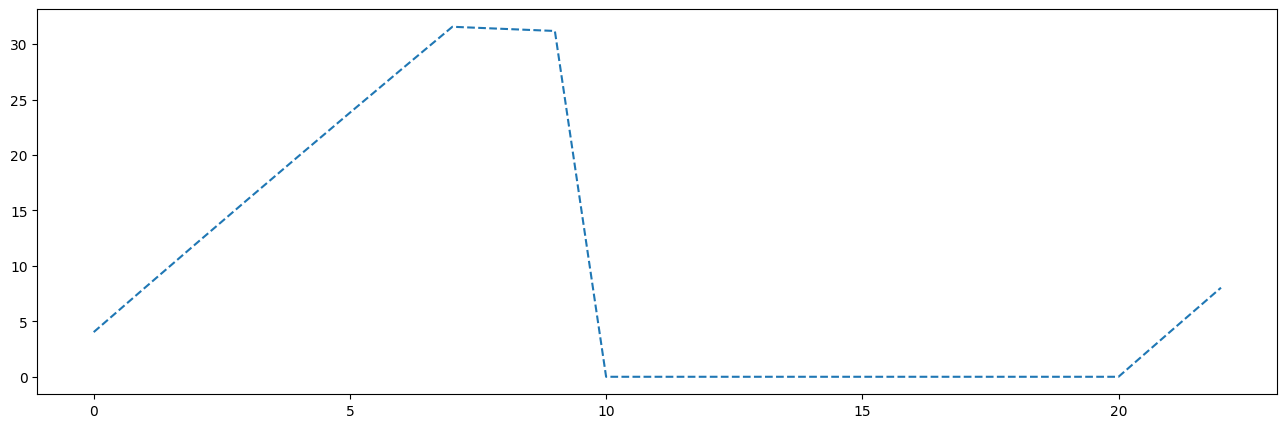

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(env.buildings[0].cooling_storage.soc[1:24], '--')

In [ ]:
env.reward_history

AttributeError: ignored

In [ ]:
outer =  env.rewards
new_list = [item for sublist in outer for item in sublist]

In [ ]:
len(new_list)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8759

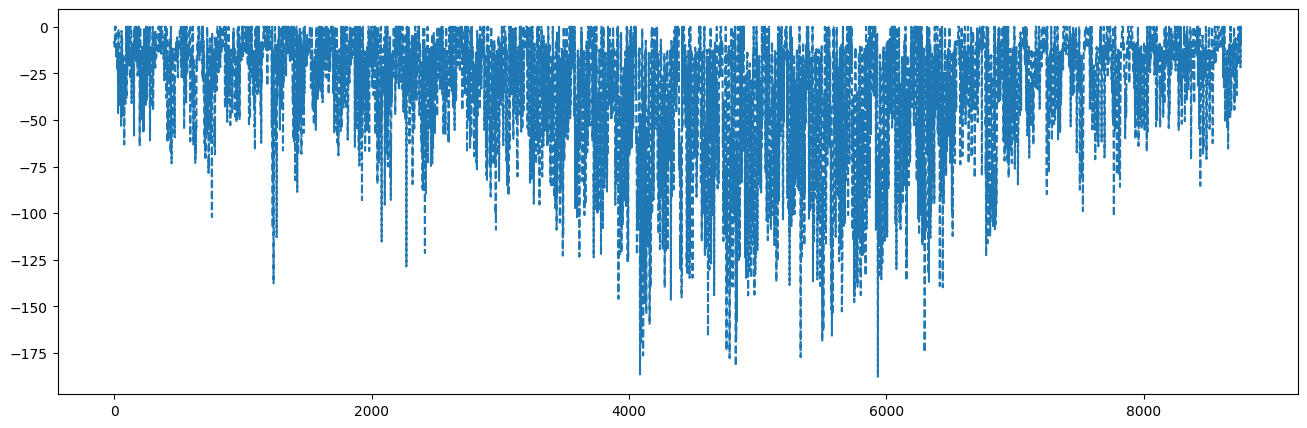

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(new_list, '--')

In [ ]:
env.cooling_storage_electricity_consumption

In [ ]:
from citylearn.citylearn import CityLearnEnv
from citylearn.agents.marlisa import MARLISA as RLAgent

In [ ]:
schema_filepath = '/content/schema.json'
schema = read_json(schema_filepath)
env = CityLearnEnv(
    schema,
    root_directory='/content/',
    central_agent=True
)

In [ ]:
model = RLAgent(env)
model.learn(episodes=2, deterministic_finish=True)#log_interval=4

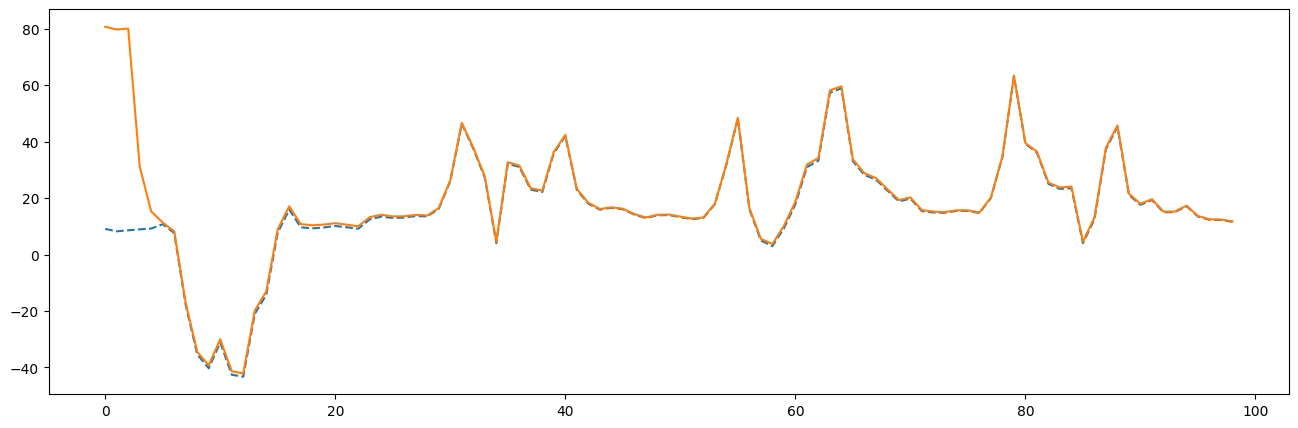

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(env.net_electricity_consumption_without_storage[1:100], '--')
plt.plot(env.net_electricity_consumption[1:100])

In [ ]:
for n, nd in env.evaluate().groupby('name'):
    nd = nd.pivot(index='name', columns='cost_function', values='value').round(3)
    print(n, ':', nd.to_dict('records'))

Building_1 : [{'carbon_emissions': nan, 'cost': 1.023, 'electricity_consumption': 1.026, 'zero_net_energy': 1.022}]
District : [{'1 - load_factor': 0.996, 'average_daily_peak': 1.013, 'carbon_emissions': nan, 'cost': 1.023, 'electricity_consumption': 1.026, 'peak_demand': 1.0, 'ramping': 1.109, 'zero_net_energy': 1.022}]


In [ ]:
len(env.net_electricity_consumption_without_storage)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8760

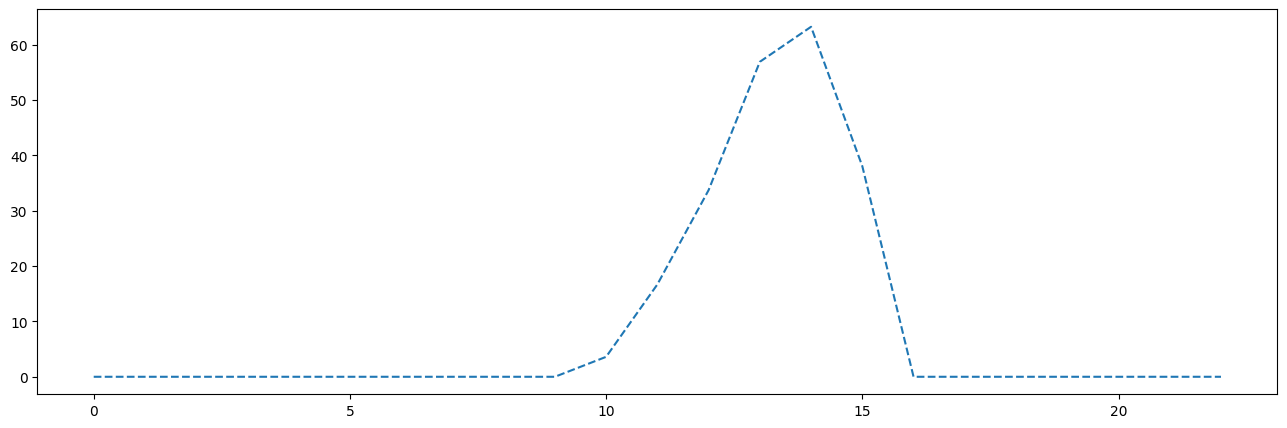

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(env.buildings[0].electrical_storage.soc[1:24], '--')

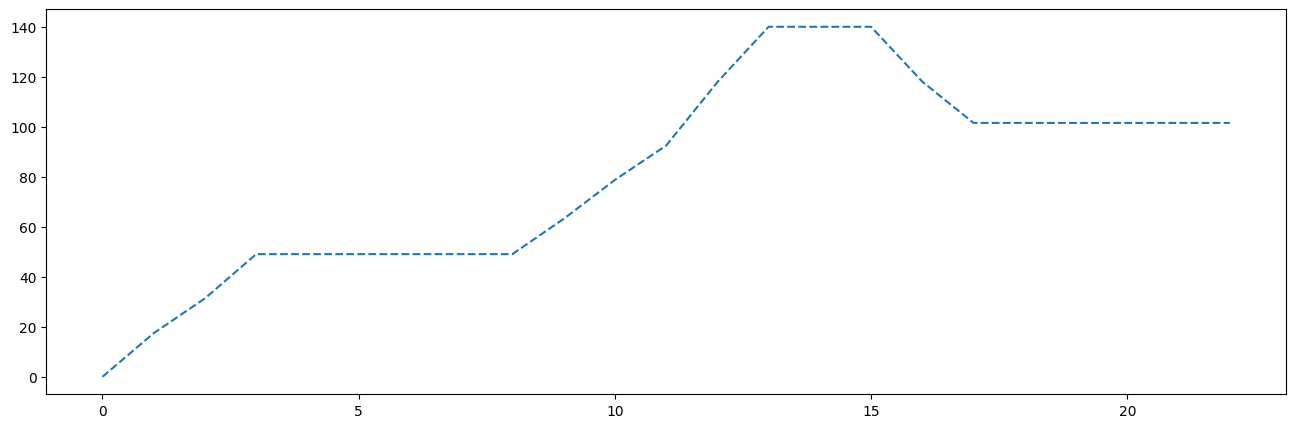

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(env.buildings[0].cooling_storage.soc[1:24], '--')

In [ ]:
print('Electrical storage capacity:', {
    b.name: b.electrical_storage.capacity for b in env.buildings
})
print('Electrical storage nominal power:', {
    b.name: b.electrical_storage.nominal_power for b in env.buildings
})
print('Electrical storage capacity history:', {
    b.name: b.electrical_storage.capacity_history for b in env.buildings
})
print('Electrical storage loss_coefficient:', {
    b.name: b.electrical_storage.loss_coefficient for b in env.buildings
})
print('Electrical storage initial_soc:', {
    b.name: b.electrical_storage.initial_soc for b in env.buildings
})
print('Electrical storage soc:', {
    b.name: b.electrical_storage.soc for b in env.buildings
})
print('Electrical storage efficiency:', {
    b.name: b.electrical_storage.efficiency for b in env.buildings
})
print('Electrical storage efficiency history:', {
    b.name: b.electrical_storage.efficiency_history for b in env.buildings
})
print('Electrical storage electricity consumption:', {
    b.name: b.electrical_storage.electricity_consumption 
    for b in env.buildings
})
print('Electrical storage capacity loss coefficient:', {
    b.name: b.electrical_storage.loss_coefficient for b in env.buildings
})
print()
# pv
print('PV nominal power:', {
    b.name: b.pv.nominal_power for b in env.buildings
})
print()


Electrical storage capacity: {'Building_1': 139.53218876867646}
Electrical storage nominal power: {'Building_1': 100.0}
Electrical storage capacity history: {'Building_1': [140.0, 139.9999363, 139.9998726, 139.9998089, 139.9997452, 139.9996815, 139.9996178, 139.9995541, 139.9994904, 139.9994344, 139.9993784, 139.9993224, 139.9992664, 139.9992104, 139.9991544, 139.9990984, 139.99906743057687, 139.99906743057687, 139.99906743057687, 139.99906743057687, 139.99906743057687, 139.99906743057687, 139.99900373057687, 139.99894003057688, 139.99887633057688, 139.99881263057688, 139.99874893057688, 139.99868523057688, 139.99862153057688, 139.99855783057689, 139.9984941305769, 139.9984304305769, 139.9983667305769, 139.9983107305769, 139.9982547305769, 139.9981987305769, 139.9981427305769, 139.9980867305769, 139.9980307305769, 139.99797473057689, 139.99791873057688, 139.99786273057688, 139.99780673057688, 139.9977851468948, 139.9977851468948, 139.9977851468948, 139.99772144689481, 139.9976577468948

In [ ]:
print('Electrical storage capacity:', {
    b.name: b.electrical_storage.capacity for b in env.buildings
})
print('Electrical storage nominal power:', {
    b.name: b.electrical_storage.nominal_power for b in env.buildings
})
print('Electrical storage capacity history:', {
    b.name: b.electrical_storage.capacity_history for b in env.buildings
})
print('Electrical storage loss_coefficient:', {
    b.name: b.electrical_storage.loss_coefficient for b in env.buildings
})
print('Electrical storage initial_soc:', {
    b.name: b.electrical_storage.initial_soc for b in env.buildings
})
print('Electrical cooling soc:', {
    b.name: b.cooling_storage.soc for b in env.buildings
})
print('Electrical storage efficiency:', {
    b.name: b.electrical_storage.efficiency for b in env.buildings
})
print('Electrical storage efficiency history:', {
    b.name: b.electrical_storage.efficiency_history for b in env.buildings
})
print('Electrical storage electricity consumption:', {
    b.name: b.electrical_storage.electricity_consumption 
    for b in env.buildings
})
print('Electrical storage capacity loss coefficient:', {
    b.name: b.electrical_storage.loss_coefficient for b in env.buildings
})
print()
# pv
print('PV nominal power:', {
    b.name: b.pv.nominal_power for b in env.buildings
})
print()

Electrical storage capacity: {'Building_1': 139.53218876867646}
Electrical storage nominal power: {'Building_1': 100.0}
Electrical storage capacity history: {'Building_1': [140.0, 139.9999363, 139.9998726, 139.9998089, 139.9997452, 139.9996815, 139.9996178, 139.9995541, 139.9994904, 139.9994344, 139.9993784, 139.9993224, 139.9992664, 139.9992104, 139.9991544, 139.9990984, 139.99906743057687, 139.99906743057687, 139.99906743057687, 139.99906743057687, 139.99906743057687, 139.99906743057687, 139.99900373057687, 139.99894003057688, 139.99887633057688, 139.99881263057688, 139.99874893057688, 139.99868523057688, 139.99862153057688, 139.99855783057689, 139.9984941305769, 139.9984304305769, 139.9983667305769, 139.9983107305769, 139.9982547305769, 139.9981987305769, 139.9981427305769, 139.9980867305769, 139.9980307305769, 139.99797473057689, 139.99791873057688, 139.99786273057688, 139.99780673057688, 139.9977851468948, 139.9977851468948, 139.9977851468948, 139.99772144689481, 139.9976577468948

#RB

In [ ]:
from citylearn.citylearn import CityLearnEnv
from citylearn.utilities import read_json
from citylearn.agents.rbc import BasicRBC as RBCAgent

schema_filepath = '/content/schema.json'
schema = read_json(schema_filepath)
env = CityLearnEnv(
    schema,
    root_directory='/content/',
    central_agent=True
)

In [ ]:
model = RBCAgent(env)
model.learn(episodes=1)